In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [189]:
data = pd.read_csv("D:/Hackathon_IFRI_IA_G_8/data/raw/Dataset_brute.csv")

In [190]:
data.iloc[-1]

ID                                              NB.VIDE > 50%
Sexe                                                       3%
Age                                                        2%
Nationalité                                                1%
Profession (selon catégorie professionnelle)              13%
                                                    ...      
Rythme Cardiaque/Régulier                                 23%
Trouble de la Repolarisation                              20%
Stage de l'IRC                                             0%
Causes Majeure après Diagnostic/HTA                        0%
Causes Majeure après Diagnostic/Diabète                    0%
Name: 308, Length: 201, dtype: object

In [191]:
df = data.copy()

In [192]:
df = df.iloc[:-1]

In [193]:
df.head()

,ID,Sexe,Age,Nationalité,Profession (selon catégorie professionnelle),Adresse (Département),Situation Matrimoniale,Motif(s) d'Admission/Asthénie,Motif(s) d'Admission/Altération de la fonction rénale,Motif(s) d'Admission/HTA,...,Pathologies/Rétinopathie diabétique,Pathologies/Artériosclérose,Pathologies/Glaucome,Autres Pathologies,Rythme Cardiaque/Sinusal,Rythme Cardiaque/Régulier,Trouble de la Repolarisation,Stage de l'IRC,Causes Majeure après Diagnostic/HTA,Causes Majeure après Diagnostic/Diabète
0,1,F,50,Béninoise,Artisan,Littoral,Marié(e),1,0,0,...,0,NaN,0,NaN,0,NaN,NaN,CKD 5,0,0
1,2,M,28,Béninoise,Artisan,Zou,Marié(e),1,1,0,...,0,NaN,0,NaN,0,NaN,NaN,CKD 5,0,0
2,3,F,69,Béninoise,NaN,Atlantique,Marié(e),1,1,0,...,0,NaN,0,NaN,0,NaN,NaN,CKD 5,0,0
3,4,M,68,Béninoise,Entrepreneur,Plateau,Marié(e),1,0,1,...,0,NaN,0,Flou visuel,0,NaN,Oui,CKD 5,0,0
4,5,F,68,Béninoise,NaN,NaN,Marié(e),1,1,0,...,0,NaN,1,NaN,0,Non,Non,CKD 5,1,0


In [194]:
# Lister les colonnes en rapport avec la maladie renal chronique
variables_interessees = [
    # Variables liées au rein
    "Contour régulier/Rein gauche",
    "Contour régulier/Rein droit",
    "Calcul Rénal",
    "Kyste",
    "Différenciation des reins",
    "Echogénicité",
    "Contour régulier/Rein droit",
    "Contour régulier/Rein gauche",
    
    # Variables liées au diabète
    "Personnels Médicaux/Diabète 1",
    "Personnels Médicaux/Diabète 2",
    "Personnels Familiaux/Diabète",
    "Durée Diabète 1 (mois)",
    "Durée Diabète 2 (mois)",
    "Pathologies/Rétinopathie diabétique",
    "Causes Majeure après Diagnostic/Diabète",
    
    # Variables liées à l'hypertension artérielle
    "Personnels Médicaux/HTA",
    "Personnels Familiaux/HTA",
    "Durée HTA (mois)",
    "Pathologies/Rétinopathie hypertensive",
    "Causes Majeure après Diagnostic/HTA",
    
    # Variables liées aux maladies héréditaires et génétiques
    "Pathologies/Artériosclérose",
    "Pathologies/Glaucome",
    
    # Variables liées aux infections rénales et traitements
    "Personnels Médicaux/Pathologies virales (HB, HC, HIV)",
    "Enquête Sociale/Phytothérapie traditionnelle",
    "Enquête Sociale/PEC oui",
    "Enquête Sociale/PEC non",
    
    # Variables liées à la créatinine
    "Créatinine (mg/L)",
    
    # Variables liées à l'âge
    "Age",
    "Sexe"
]

# Afficher la liste des variables
print(variables_interessees)
print(len(variables_interessees))

['Contour régulier/Rein gauche', 'Contour régulier/Rein droit', 'Calcul Rénal', 'Kyste', 'Différenciation des reins', 'Echogénicité', 'Contour régulier/Rein droit', 'Contour régulier/Rein gauche', 'Personnels Médicaux/Diabète 1', 'Personnels Médicaux/Diabète 2', 'Personnels Familiaux/Diabète', 'Durée Diabète 1 (mois)', 'Durée Diabète 2 (mois)', 'Pathologies/Rétinopathie diabétique', 'Causes Majeure après Diagnostic/Diabète', 'Personnels Médicaux/HTA', 'Personnels Familiaux/HTA', 'Durée HTA (mois)', 'Pathologies/Rétinopathie hypertensive', 'Causes Majeure après Diagnostic/HTA', 'Pathologies/Artériosclérose', 'Pathologies/Glaucome', 'Personnels Médicaux/Pathologies virales (HB, HC, HIV)', 'Enquête Sociale/Phytothérapie traditionnelle', 'Enquête Sociale/PEC oui', 'Enquête Sociale/PEC non', 'Créatinine (mg/L)', 'Age', 'Sexe']
29


In [195]:
# Ajouter des variables pertinentes pour prédire le stade de la maladie rénale chronique
variables_supplementaires = [
    # Variables liées aux symptômes
    "Symptômes/Fièvre",
    "Symptômes/Céphalées",
    "Symptômes/Douleur Lombaire",
    "Symptômes/Dysurie",
    "Symptômes/Oligurie",
    "Symptômes/Diarrhée",
    "Symptômes/Douleur Thoracique",
    
    # Variables liées aux analyses biologiques
    "Créatinine (mg/L)",
    "Protéinurie",
    "Na^+ (meq/L)",
    "K^+ (meq/L)",
    "Ca^2+ (meq/L)",
    "Cl^- (meq/L)",
    "P (meq/L)",
    "Hb (g/dL)",
    "Hte (%)",
    "Hématie (T/L)",
    "VGM (fL)",
    "TCMH (pg)",
    "CCMH (%)",
    "Plaquettes (g/L)",
    "Poul (bpm)",
    "Poids (Kg)",
    
    # Variables liées aux antécédents médicaux
    "Personnels Médicaux/IRC",
    "Personnels Médicaux/HTA",
    "Personnels Médicaux/Diabète 1",
    "Personnels Médicaux/Diabète 2",
    "Personnels Médicaux/Pathologies virales (HB, HC, HIV)",
    
    # Variables liées aux reins
    "Calcul Rénal",
    "Kyste",
    "Différenciation des reins",
    "Echogénicité",
    "Contour régulier/Rein droit",
    "Contour régulier/Rein gauche"
]

# Ajouter ces variables à la liste existante
variables_interessees.extend(variables_supplementaires)

# Afficher la liste mise à jour des variables
print("Variables sélectionnées pour la prédiction :")
print(variables_interessees)
print(len(variables_interessees))


Variables sélectionnées pour la prédiction :
['Contour régulier/Rein gauche', 'Contour régulier/Rein droit', 'Calcul Rénal', 'Kyste', 'Différenciation des reins', 'Echogénicité', 'Contour régulier/Rein droit', 'Contour régulier/Rein gauche', 'Personnels Médicaux/Diabète 1', 'Personnels Médicaux/Diabète 2', 'Personnels Familiaux/Diabète', 'Durée Diabète 1 (mois)', 'Durée Diabète 2 (mois)', 'Pathologies/Rétinopathie diabétique', 'Causes Majeure après Diagnostic/Diabète', 'Personnels Médicaux/HTA', 'Personnels Familiaux/HTA', 'Durée HTA (mois)', 'Pathologies/Rétinopathie hypertensive', 'Causes Majeure après Diagnostic/HTA', 'Pathologies/Artériosclérose', 'Pathologies/Glaucome', 'Personnels Médicaux/Pathologies virales (HB, HC, HIV)', 'Enquête Sociale/Phytothérapie traditionnelle', 'Enquête Sociale/PEC oui', 'Enquête Sociale/PEC non', 'Créatinine (mg/L)', 'Age', 'Sexe', 'Symptômes/Fièvre', 'Symptômes/Céphalées', 'Symptômes/Douleur Lombaire', 'Symptômes/Dysurie', 'Symptômes/Oligurie', 'Symp

In [196]:
# Vérifier si toutes les colonnes de variables_interessees existent dans df
colonnes_existantes = [col for col in variables_interessees if col in df.columns]

# Ajouter un avertissement si certaines colonnes sont manquantes
colonnes_manquantes = set(variables_interessees) - set(colonnes_existantes)
if colonnes_manquantes:
    print(f"Avertissement : Les colonnes suivantes sont absentes du DataFrame : {colonnes_manquantes}")

In [197]:
# Ajouter la variable cible aux variables sélectionnées
variables_interessees.append("Stage de l'IRC")

# Créer un nouveau DataFrame avec les variables sélectionnées
df1 = df[variables_interessees]

# Afficher les premières lignes du nouveau DataFrame
df1.head()

,Contour régulier/Rein gauche,Contour régulier/Rein droit,Calcul Rénal,Kyste,Différenciation des reins,Echogénicité,Contour régulier/Rein droit,Contour régulier/Rein gauche,Personnels Médicaux/Diabète 1,Personnels Médicaux/Diabète 2,...,Personnels Médicaux/Diabète 1,Personnels Médicaux/Diabète 2,"Personnels Médicaux/Pathologies virales (HB, HC, HIV)",Calcul Rénal,Kyste,Différenciation des reins,Echogénicité,Contour régulier/Rein droit,Contour régulier/Rein gauche,Stage de l'IRC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,CKD 5
1,Oui,Oui,Non,Non,Bien différenciés,Hyper Echogénicité,Oui,Oui,0,0,...,0,0,0,Non,Non,Bien différenciés,Hyper Echogénicité,Oui,Oui,CKD 5
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,...,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,CKD 5
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,CKD 5
4,Oui,Oui,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,0,0,...,0,0,0,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,CKD 5


In [198]:
df1["Stage de l\'IRC"].nunique

<bound method IndexOpsMixin.nunique of 0       CKD 5
1       CKD 5
2       CKD 5
3       CKD 5
4       CKD 5
        ...  
303    CKD 3a
304    CKD 3a
305    CKD 3a
306       NaN
307       NaN
Name: Stage de l'IRC, Length: 308, dtype: object>

In [199]:
import pandas as pd
import numpy as np

# 1. Inspection approfondie des valeurs
print("Valeurs uniques AVANT transformation :")
print(df1["Stage de l\'IRC"].unique())

# 3. Mapping complet avec gestion des cas particuliers
mapping = {
    'CKD 1': 0,
    'CKD 2': 1, 
    'CKD 3a': 2,
    'CKD 3b': 3,
    'CKD 4': 4,
    'CKD 5': 5,
}

# 4. Application robuste du mapping
def safe_mapping(x):
    try:
        return mapping[x]
    except KeyError:
        print(f"Valeur non mappée trouvée : {x}")
        return np.nan

df1["Stage de l\'IRC"] = df1["Stage de l\'IRC"].apply(safe_mapping)

# 5. Vérification des résultats
print("\nValeurs uniques APRES transformation :")
print(df1["Stage de l\'IRC"].unique())

print("\nRépartition des valeurs :")
print(df1["Stage de l\'IRC"].value_counts(dropna=False).sort_index())



Valeurs uniques AVANT transformation :
['CKD 5' 'CKD 2' 'CKD 4' 'CKD 3a' 'CKD 1' 'CKD 3b' nan]
Valeur non mappée trouvée : nan
Valeur non mappée trouvée : nan

Valeurs uniques APRES transformation :
[ 5.  1.  4.  2.  0.  3. nan]

Répartition des valeurs :
Stage de l'IRC
0.0    46
1.0    52
2.0    49
3.0    49
4.0    50
5.0    60
NaN     2
Name: count, dtype: int64


C:\Users\LENOVO YOGA\AppData\Local\Temp\ipykernel_11160\974620215.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Stage de l\'IRC"] = df1["Stage de l\'IRC"].apply(safe_mapping)


In [200]:
# Supprimer les lignes avec des valeurs manquantes dans la colonne "Stage de l'IRC"
df1 = df1.dropna(subset=["Stage de l'IRC"])

# Vérifier le résultat
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 305
Data columns (total 64 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Contour régulier/Rein gauche                           130 non-null    object 
 1   Contour régulier/Rein droit                            130 non-null    object 
 2   Calcul Rénal                                           130 non-null    object 
 3   Kyste                                                  130 non-null    object 
 4   Différenciation des reins                              130 non-null    object 
 5   Echogénicité                                           130 non-null    object 
 6   Contour régulier/Rein droit                            130 non-null    object 
 7   Contour régulier/Rein gauche                           130 non-null    object 
 8   Personnels Médicaux/Diabète 1                          

In [201]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 305
Data columns (total 64 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Contour régulier/Rein gauche                           130 non-null    object 
 1   Contour régulier/Rein droit                            130 non-null    object 
 2   Calcul Rénal                                           130 non-null    object 
 3   Kyste                                                  130 non-null    object 
 4   Différenciation des reins                              130 non-null    object 
 5   Echogénicité                                           130 non-null    object 
 6   Contour régulier/Rein droit                            130 non-null    object 
 7   Contour régulier/Rein gauche                           130 non-null    object 
 8   Personnels Médicaux/Diabète 1                          

In [202]:
df.isnull().sum()

ID                                               2
Sexe                                            10
Age                                              9
Nationalité                                      5
Profession (selon catégorie professionnelle)    41
                                                ..
Rythme Cardiaque/Régulier                       73
Trouble de la Repolarisation                    63
Stage de l'IRC                                   2
Causes Majeure après Diagnostic/HTA              2
Causes Majeure après Diagnostic/Diabète          2
Length: 201, dtype: int64

In [203]:
df1.describe()

,Stage de l'IRC
count,306.000000
mean,2.604575
std,1.730302
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,5.000000


## Test avec le dataframe df1 

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Columns: 201 entries, ID to Causes Majeure après Diagnostic/Diabète
dtypes: object(201)
memory usage: 483.8+ KB


In [205]:
def afficher_colonnes_valeurs_manquantes(df1, seuil):
    """
    Affiche les colonnes ayant plus de `seuil` valeurs manquantes dans le DataFrame,
    calcule la somme des valeurs manquantes pour ces colonnes,
    et retourne le nombre de colonnes concernées.

    Parameters:
        df (pd.DataFrame): Le DataFrame à analyser.
        seuil (int): Le seuil de valeurs manquantes.

    Returns:
        int: Le nombre de colonnes ayant plus de `seuil` valeurs manquantes.
    """
    # Calculer le nombre de valeurs manquantes par colonne
    valeurs_manquantes = df1.isnull().sum()
    
    # Filtrer les colonnes ayant plus de `seuil` valeurs manquantes
    colonnes_filtrees = valeurs_manquantes[valeurs_manquantes > seuil]
    
    # Afficher les colonnes et leurs valeurs manquantes
    print("Colonnes avec plus de", seuil, "valeurs manquantes :")
    print(colonnes_filtrees)
    
    # Calculer la somme des valeurs manquantes pour ces colonnes
    somme_valeurs_manquantes = colonnes_filtrees.sum()
    print("\nSomme totale des valeurs manquantes pour ces colonnes :", somme_valeurs_manquantes)
    
    # Retourner le nombre de colonnes concernées
    nombre_colonnes = len(colonnes_filtrees)
    print("\nNombre de colonnes avec plus de", seuil, "valeurs manquantes :", nombre_colonnes)
    
    return nombre_colonnes

# Exemple d'utilisation
nombre_colonnes = afficher_colonnes_valeurs_manquantes(df1, seuil=200)

Colonnes avec plus de 200 valeurs manquantes :
Durée Diabète 1 (mois)         304
Durée Diabète 2 (mois)         222
Pathologies/Artériosclérose    296
Protéinurie                    245
Hte (%)                        202
Hématie (T/L)                  254
dtype: int64

Somme totale des valeurs manquantes pour ces colonnes : 1523

Nombre de colonnes avec plus de 200 valeurs manquantes : 6


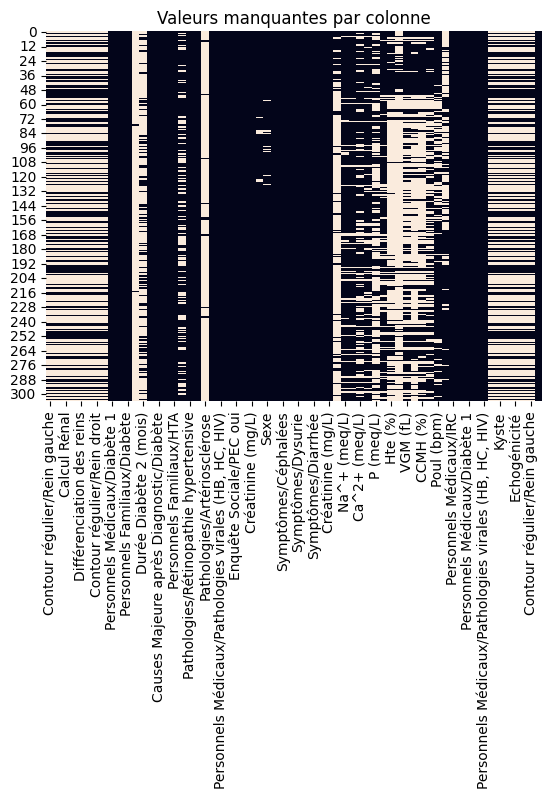

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt  # Importation manquante

sns.heatmap(df1.isnull(), cbar=False)
plt.title("Valeurs manquantes par colonne")
plt.show()

In [207]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percentage = df1.isnull().mean() * 100

# Identifier les colonnes ayant plus de 80% de valeurs manquantes
columns_to_drop = missing_percentage[missing_percentage > 80].index

# Afficher les colonnes supprimées
print("Colonnes supprimées :")
print(columns_to_drop.tolist())

# Supprimer les colonnes du DataFrame
df1 = df1.drop(columns=columns_to_drop)

Colonnes supprimées :
['Durée Diabète 1 (mois)', 'Pathologies/Artériosclérose', 'Protéinurie', 'Hématie (T/L)']


In [208]:
df1.head()

,Contour régulier/Rein gauche,Contour régulier/Rein droit,Calcul Rénal,Kyste,Différenciation des reins,Echogénicité,Contour régulier/Rein droit,Contour régulier/Rein gauche,Personnels Médicaux/Diabète 1,Personnels Médicaux/Diabète 2,...,Personnels Médicaux/Diabète 1,Personnels Médicaux/Diabète 2,"Personnels Médicaux/Pathologies virales (HB, HC, HIV)",Calcul Rénal,Kyste,Différenciation des reins,Echogénicité,Contour régulier/Rein droit,Contour régulier/Rein gauche,Stage de l'IRC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,5.0
1,Oui,Oui,Non,Non,Bien différenciés,Hyper Echogénicité,Oui,Oui,0,0,...,0,0,0,Non,Non,Bien différenciés,Hyper Echogénicité,Oui,Oui,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,...,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,Oui,Oui,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,0,0,...,0,0,0,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,5.0


In [209]:
# Compter le nombre de valeurs uniques dans la colonne 'Stage de l'IRC'
unique_values_count = df1["Stage de l'IRC"].nunique()
print(f"Nombre de valeurs uniques dans 'Stage de l'IRC' : {unique_values_count}")

Nombre de valeurs uniques dans 'Stage de l'IRC' : 6


In [210]:
df1.head()

,Contour régulier/Rein gauche,Contour régulier/Rein droit,Calcul Rénal,Kyste,Différenciation des reins,Echogénicité,Contour régulier/Rein droit,Contour régulier/Rein gauche,Personnels Médicaux/Diabète 1,Personnels Médicaux/Diabète 2,...,Personnels Médicaux/Diabète 1,Personnels Médicaux/Diabète 2,"Personnels Médicaux/Pathologies virales (HB, HC, HIV)",Calcul Rénal,Kyste,Différenciation des reins,Echogénicité,Contour régulier/Rein droit,Contour régulier/Rein gauche,Stage de l'IRC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,5.0
1,Oui,Oui,Non,Non,Bien différenciés,Hyper Echogénicité,Oui,Oui,0,0,...,0,0,0,Non,Non,Bien différenciés,Hyper Echogénicité,Oui,Oui,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,...,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,Oui,Oui,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,0,0,...,0,0,0,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,5.0


### Convertir les colonnnes qui ont des valeur s en intervalles par la moyenne de ce intervalle 

In [211]:
import re

def convert_interval(value):
    if isinstance(value, str) and "[" in value and ";" in value:
        numbers = list(map(int, re.findall(r'\d+', value)))
        if numbers:  # Vérifier que la liste n'est pas vide
            return sum(numbers) / len(numbers)  # Moyenne des bornes
    return value  # Garder les valeurs déjà numériques ou non valides

# Appliquer la fonction à toutes les colonnes du DataFrame
for column in df1.columns:
    df1[column] = df1[column].apply(convert_interval)

In [212]:
import re

def remove_signs(value):
    if isinstance(value, str):  
        numbers = re.findall(r'\d+', value)  # Extraire les nombres
        if numbers:
            return int(numbers[0])  # Garder uniquement le premier nombre trouvé
    return value  # Retourner la valeur inchangée si ce n'est pas du texte

df1 = df1.applymap(remove_signs)  # Appliquer à toutes les colonnes


C:\Users\LENOVO YOGA\AppData\Local\Temp\ipykernel_11160\4154579084.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = df1.applymap(remove_signs)  # Appliquer à toutes les colonnes


In [213]:
df1

,Contour régulier/Rein gauche,Contour régulier/Rein droit,Calcul Rénal,Kyste,Différenciation des reins,Echogénicité,Contour régulier/Rein droit,Contour régulier/Rein gauche,Personnels Médicaux/Diabète 1,Personnels Médicaux/Diabète 2,...,Personnels Médicaux/Diabète 1,Personnels Médicaux/Diabète 2,"Personnels Médicaux/Pathologies virales (HB, HC, HIV)",Calcul Rénal,Kyste,Différenciation des reins,Echogénicité,Contour régulier/Rein droit,Contour régulier/Rein gauche,Stage de l'IRC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,5.0
1,Oui,Oui,Non,Non,Bien différenciés,Hyper Echogénicité,Oui,Oui,0,0,...,0,0,0,Non,Non,Bien différenciés,Hyper Echogénicité,Oui,Oui,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,...,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,Oui,Oui,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,0,0,...,0,0,0,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
302,Oui,Oui,Non,Non,Perte de différenciation,Homogénéité,Oui,Oui,0,0,...,0,0,0,Non,Non,Perte de différenciation,Homogénéité,Oui,Oui,2.0
303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
304,Oui,Oui,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,0,1,...,0,1,0,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,2.0


In [214]:
df1.sample(30)

,Contour régulier/Rein gauche,Contour régulier/Rein droit,Calcul Rénal,Kyste,Différenciation des reins,Echogénicité,Contour régulier/Rein droit,Contour régulier/Rein gauche,Personnels Médicaux/Diabète 1,Personnels Médicaux/Diabète 2,...,Personnels Médicaux/Diabète 1,Personnels Médicaux/Diabète 2,"Personnels Médicaux/Pathologies virales (HB, HC, HIV)",Calcul Rénal,Kyste,Différenciation des reins,Echogénicité,Contour régulier/Rein droit,Contour régulier/Rein gauche,Stage de l'IRC
77,Oui,Oui,Non,Non,Perte de différenciation,Hyper Echogénicité,Oui,Oui,1,0,...,1,0,0,Non,Non,Perte de différenciation,Hyper Echogénicité,Oui,Oui,4.0
239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,4.0
110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
246,Oui,Oui,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,0,0,...,0,0,0,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,1.0
269,Oui,Oui,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,0,1,...,0,1,0,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,3.0
124,Oui,Oui,Non,Non,Perte de différenciation,Hyper Echogénicité,Oui,Oui,0,1,...,0,1,0,Non,Non,Perte de différenciation,Hyper Echogénicité,Oui,Oui,4.0
97,Oui,Oui,Non,Oui,Perte de différenciation,Hyper Echogénicité,Oui,Oui,0,1,...,0,1,0,Non,Oui,Perte de différenciation,Hyper Echogénicité,Oui,Oui,2.0


In [215]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 305
Data columns (total 60 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Contour régulier/Rein gauche                           130 non-null    object 
 1   Contour régulier/Rein droit                            130 non-null    object 
 2   Calcul Rénal                                           130 non-null    object 
 3   Kyste                                                  130 non-null    object 
 4   Différenciation des reins                              130 non-null    object 
 5   Echogénicité                                           130 non-null    object 
 6   Contour régulier/Rein droit                            130 non-null    object 
 7   Contour régulier/Rein gauche                           130 non-null    object 
 8   Personnels Médicaux/Diabète 1                          

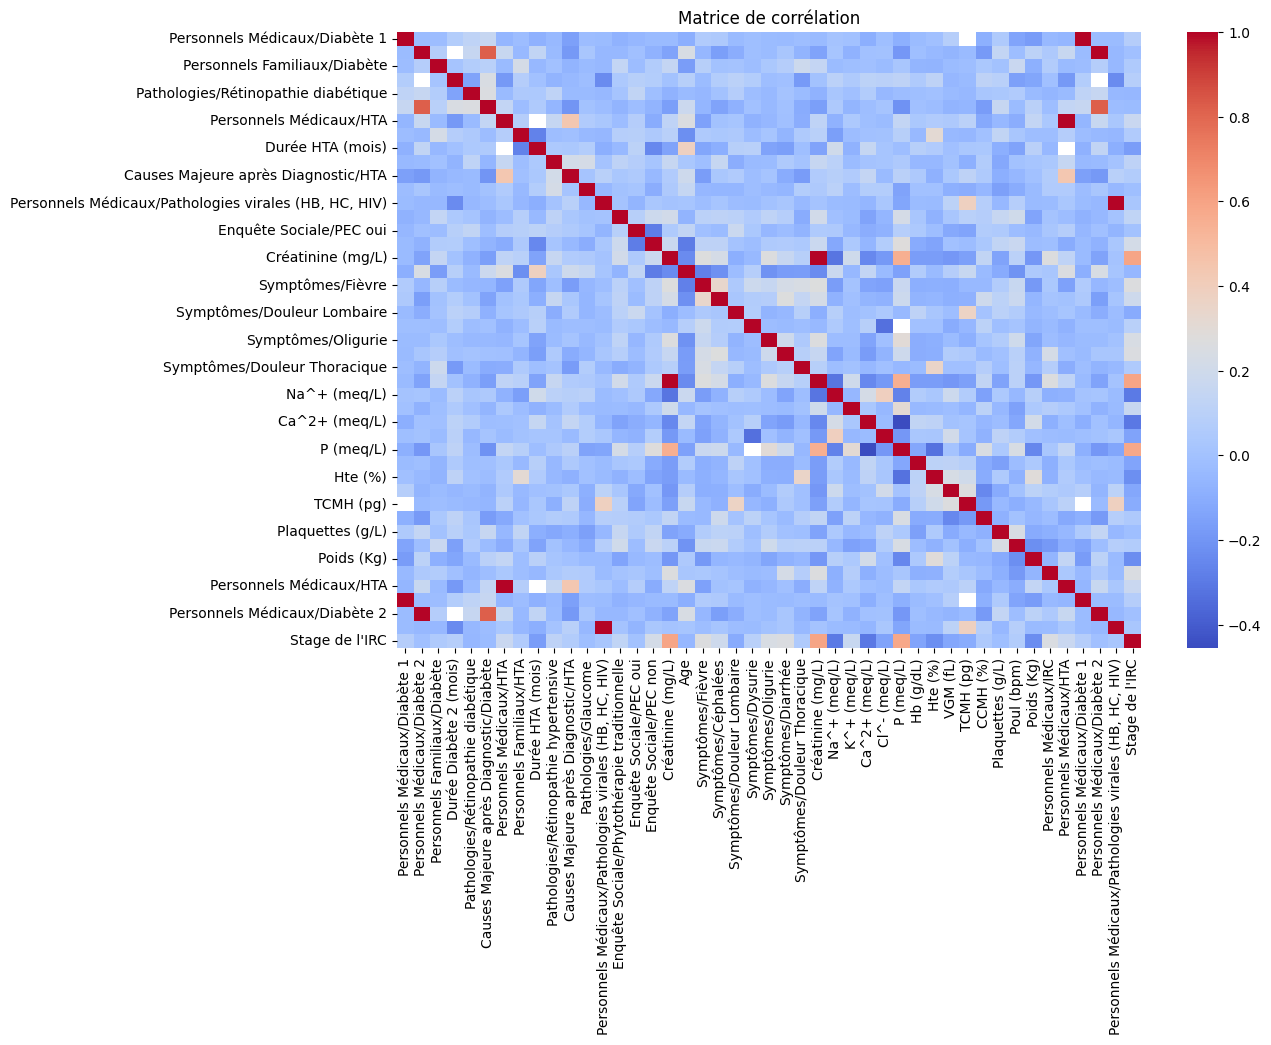

In [216]:
# Sélectionner uniquement les colonnes numériques
numeric_df = df1.select_dtypes(include=['number'])

# Calculer la matrice de corrélation
correlation_matrix = numeric_df.corr()

# Visualiser la matrice de corrélation avec une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Matrice de corrélation")
plt.show()

In [217]:
df1["Stage de l\'IRC"]

0      5.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
301    2.0
302    2.0
303    2.0
304    2.0
305    2.0
Name: Stage de l'IRC, Length: 306, dtype: float64

In [218]:
df1.describe()

,Personnels Médicaux/Diabète 1,Personnels Médicaux/Diabète 2,Personnels Familiaux/Diabète,Durée Diabète 2 (mois),Pathologies/Rétinopathie diabétique,Causes Majeure après Diagnostic/Diabète,Personnels Médicaux/HTA,Personnels Familiaux/HTA,Durée HTA (mois),Pathologies/Rétinopathie hypertensive,...,CCMH (%),Plaquettes (g/L),Poul (bpm),Poids (Kg),Personnels Médicaux/IRC,Personnels Médicaux/HTA,Personnels Médicaux/Diabète 1,Personnels Médicaux/Diabète 2,"Personnels Médicaux/Pathologies virales (HB, HC, HIV)",Stage de l'IRC
count,306.000000,306.000000,306.000000,84.000000,306.000000,306.000000,306.000000,306.000000,198.000000,306.000000,...,140.000000,196.000000,237.000000,180.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,0.016340,0.307190,0.032680,95.642857,0.032680,0.271242,0.784314,0.045752,81.969697,0.101307,...,32.414286,253.168367,81.645570,74.983333,0.094771,0.784314,0.016340,0.307190,0.058824,2.604575
std,0.126987,0.462084,0.178088,36.764193,0.178088,0.445329,0.411971,0.209288,41.083536,0.302229,...,1.967307,109.533590,20.029028,17.957266,0.293378,0.411971,0.126987,0.462084,0.235680,1.730302
min,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,...,24.000000,1.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,1.000000,0.000000,36.000000,0.000000,...,31.000000,181.500000,73.000000,61.750000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,90.000000,0.000000,...,32.500000,240.500000,83.000000,73.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,1.000000,0.000000,120.000000,0.000000,1.000000,1.000000,0.000000,120.000000,0.000000,...,34.000000,309.000000,93.000000,87.250000,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000
max,1.000000,1.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,120.000000,1.000000,...,37.000000,748.000000,134.000000,125.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


### Copy de df1 dans df_clean et traitement des valeurs manquantes 

In [219]:
# Copie du DataFrame
df_clean = df1.copy()

# 1. Sélection des colonnes quantitatives (numériques)
quantitative_cols = df_clean.select_dtypes(include=['number']).columns
qualitative_cols = df_clean.select_dtypes(exclude=['number']).columns


# 2. Remplacement par la médiane pour chaque colonne
for col in quantitative_cols:
    # Calcul de la médiane (ignore automatiquement les NaN)
    median_val = df_clean[col].median()
    
    # Remplacement des valeurs manquantes
    df_clean[col] = df_clean[col].fillna(median_val)

for col in qualitative_cols:
    # Calcul du mode (en ignorant les NaN)
    mode_val = df_clean[col].mode().iloc[0] if not df_clean[col].mode().empty else "inconnu"
    
    # Remplacement des NaN
    df_clean[col] = df_clean[col].fillna(mode_val)

# Vérification
print("Valeurs manquantes après remplacement :")
print(df_clean.isna().sum())

Valeurs manquantes après remplacement :
Contour régulier/Rein gauche                             0
Contour régulier/Rein droit                              0
Calcul Rénal                                             0
Kyste                                                    0
Différenciation des reins                                0
Echogénicité                                             0
Contour régulier/Rein droit                              0
Contour régulier/Rein gauche                             0
Personnels Médicaux/Diabète 1                            0
Personnels Médicaux/Diabète 2                            0
Personnels Familiaux/Diabète                             0
Durée Diabète 2 (mois)                                   0
Pathologies/Rétinopathie diabétique                      0
Causes Majeure après Diagnostic/Diabète                  0
Personnels Médicaux/HTA                                  0
Personnels Familiaux/HTA                                 0
Durée HTA (mois)

In [220]:
df_clean.isnull().sum()

Contour régulier/Rein gauche                             0
Contour régulier/Rein droit                              0
Calcul Rénal                                             0
Kyste                                                    0
Différenciation des reins                                0
Echogénicité                                             0
Contour régulier/Rein droit                              0
Contour régulier/Rein gauche                             0
Personnels Médicaux/Diabète 1                            0
Personnels Médicaux/Diabète 2                            0
Personnels Familiaux/Diabète                             0
Durée Diabète 2 (mois)                                   0
Pathologies/Rétinopathie diabétique                      0
Causes Majeure après Diagnostic/Diabète                  0
Personnels Médicaux/HTA                                  0
Personnels Familiaux/HTA                                 0
Durée HTA (mois)                                        

In [221]:
df_clean.describe()

,Personnels Médicaux/Diabète 1,Personnels Médicaux/Diabète 2,Personnels Familiaux/Diabète,Durée Diabète 2 (mois),Pathologies/Rétinopathie diabétique,Causes Majeure après Diagnostic/Diabète,Personnels Médicaux/HTA,Personnels Familiaux/HTA,Durée HTA (mois),Pathologies/Rétinopathie hypertensive,...,CCMH (%),Plaquettes (g/L),Poul (bpm),Poids (Kg),Personnels Médicaux/IRC,Personnels Médicaux/HTA,Personnels Médicaux/Diabète 1,Personnels Médicaux/Diabète 2,"Personnels Médicaux/Pathologies virales (HB, HC, HIV)",Stage de l'IRC
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,...,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,0.016340,0.307190,0.032680,113.313725,0.032680,0.271242,0.784314,0.045752,84.803922,0.101307,...,32.460784,248.614379,81.950980,74.166667,0.094771,0.784314,0.016340,0.307190,0.058824,2.604575
std,0.126987,0.462084,0.178088,22.053429,0.178088,0.445329,0.411971,0.209288,33.241009,0.302229,...,1.328785,87.793368,17.627499,13.791480,0.293378,0.411971,0.126987,0.462084,0.235680,1.730302
min,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,...,24.000000,1.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,90.000000,0.000000,...,32.500000,216.000000,76.000000,70.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,90.000000,0.000000,...,32.500000,240.500000,83.000000,73.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,1.000000,0.000000,120.000000,0.000000,1.000000,1.000000,0.000000,120.000000,0.000000,...,32.500000,270.250000,90.000000,78.000000,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000
max,1.000000,1.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,120.000000,1.000000,...,37.000000,748.000000,134.000000,125.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [222]:
df_clean

,Contour régulier/Rein gauche,Contour régulier/Rein droit,Calcul Rénal,Kyste,Différenciation des reins,Echogénicité,Contour régulier/Rein droit,Contour régulier/Rein gauche,Personnels Médicaux/Diabète 1,Personnels Médicaux/Diabète 2,...,Personnels Médicaux/Diabète 1,Personnels Médicaux/Diabète 2,"Personnels Médicaux/Pathologies virales (HB, HC, HIV)",Calcul Rénal,Kyste,Différenciation des reins,Echogénicité,Contour régulier/Rein droit,Contour régulier/Rein gauche,Stage de l'IRC
0,Oui,Oui,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,0,0,...,0,0,0,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,5.0
1,Oui,Oui,Non,Non,Bien différenciés,Hyper Echogénicité,Oui,Oui,0,0,...,0,0,0,Non,Non,Bien différenciés,Hyper Echogénicité,Oui,Oui,5.0
2,Oui,Oui,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,0,1,...,0,1,0,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,5.0
3,Oui,Oui,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,0,0,...,0,0,0,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,5.0
4,Oui,Oui,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,0,0,...,0,0,0,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Oui,Oui,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,0,0,...,0,0,0,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,2.0
302,Oui,Oui,Non,Non,Perte de différenciation,Homogénéité,Oui,Oui,0,0,...,0,0,0,Non,Non,Perte de différenciation,Homogénéité,Oui,Oui,2.0
303,Oui,Oui,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,0,0,...,0,0,0,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,2.0
304,Oui,Oui,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,0,1,...,0,1,0,Non,Non,Bien différenciés,Homogénéité,Oui,Oui,2.0


## Affichage et traitement des valeurs Aberantes et incoherentes avant le traitement

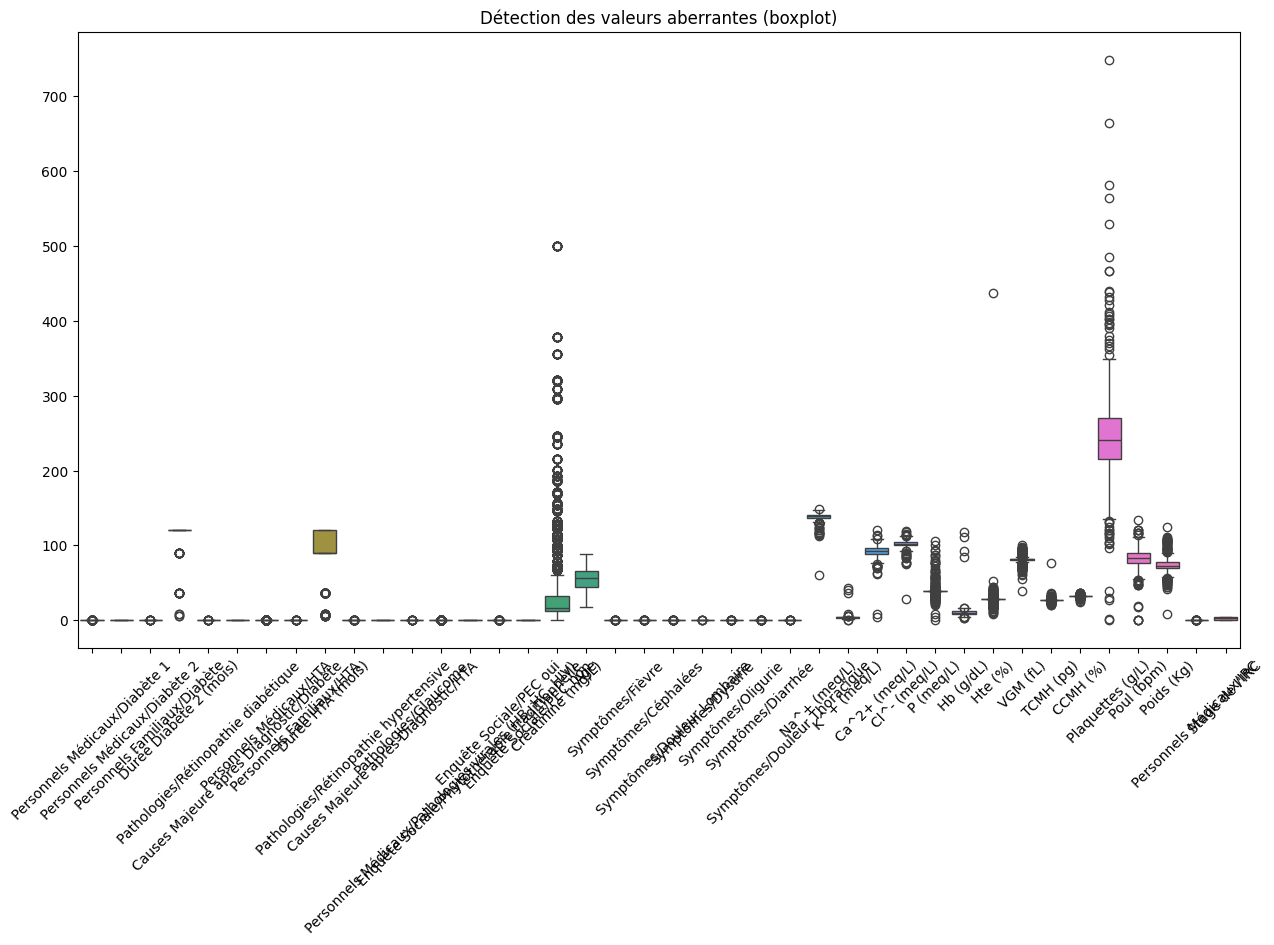

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes numériques
numeric_cols = df_clean.select_dtypes(include=['number']).columns

# Visualisation des outliers avec boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_clean[numeric_cols])
plt.xticks(rotation=45)
plt.title("Détection des valeurs aberrantes (boxplot)")
plt.show()

In [224]:
# Concaténer toutes les colonnes en une seule colonne
df_flattened = df_clean.apply(lambda row: ' '.join(row.astype(str)), axis=1)

# Afficher les premières lignes de la colonne résultante
print(df_flattened.head())

0    Oui Oui Non Non Bien différenciés Homogénéité ...
1    Oui Oui Non Non Bien différenciés Hyper Echogé...
2    Oui Oui Non Non Bien différenciés Homogénéité ...
3    Oui Oui Non Non Bien différenciés Homogénéité ...
4    Oui Oui Non Non Bien différenciés Homogénéité ...
dtype: object


In [225]:
import re

def convert_to_single_dimension(value):
    """
    Convertit une valeur non unidimensionnelle (par exemple, un intervalle ou une liste)
    en une seule dimension, comme la moyenne des bornes d'un intervalle.

    Parameters:
        value: La valeur à convertir.

    Returns:
        La valeur convertie en une seule dimension.
    """
    if isinstance(value, str) and "[" in value and ";" in value:
        # Extraire les nombres dans l'intervalle
        numbers = list(map(float, re.findall(r'\d+\.?\d*', value)))
        if numbers:
            return sum(numbers) / len(numbers)  # Moyenne des bornes
    return value  # Retourner la valeur inchangée si elle est déjà unidimensionnelle

# Appliquer la fonction à toutes les colonnes de df_clean
for column in df_clean.columns:
    df_clean[column] = df_clean[column].apply(convert_to_single_dimension)

# Vérifier le résultat
print("Transformation terminée. Voici un aperçu des données :")
print(df_clean.head())

Transformation terminée. Voici un aperçu des données :
   Contour régulier/Rein gauche  Contour régulier/Rein droit  Calcul Rénal  \
0                           Oui                          Oui           Non   
1                           Oui                          Oui           Non   
2                           Oui                          Oui           Non   
3                           Oui                          Oui           Non   
4                           Oui                          Oui           Non   

   Kyste  Différenciation des reins        Echogénicité  \
0    Non          Bien différenciés         Homogénéité   
1    Non          Bien différenciés  Hyper Echogénicité   
2    Non          Bien différenciés         Homogénéité   
3    Non          Bien différenciés         Homogénéité   
4    Non          Bien différenciés         Homogénéité   

   Contour régulier/Rein droit  Contour régulier/Rein gauche  \
0                          Oui                           

In [226]:
# Identifier les colonnes non uniques
non_unique_columns = df_clean.columns[df_clean.columns.duplicated()].tolist()

# Supprimer les colonnes non uniques
df_clean = df_clean.loc[:, ~df_clean.columns.duplicated()]

# Vérifier les colonnes restantes
print("Colonnes restantes après suppression des colonnes non uniques :")
print(df_clean.columns)

Colonnes restantes après suppression des colonnes non uniques :
Index(['Contour régulier/Rein gauche', 'Contour régulier/Rein droit',
       'Calcul Rénal', 'Kyste', 'Différenciation des reins', 'Echogénicité',
       'Personnels Médicaux/Diabète 1', 'Personnels Médicaux/Diabète 2',
       'Personnels Familiaux/Diabète', 'Durée Diabète 2 (mois)',
       'Pathologies/Rétinopathie diabétique',
       'Causes Majeure après Diagnostic/Diabète', 'Personnels Médicaux/HTA',
       'Personnels Familiaux/HTA', 'Durée HTA (mois)',
       'Pathologies/Rétinopathie hypertensive',
       'Causes Majeure après Diagnostic/HTA', 'Pathologies/Glaucome',
       'Personnels Médicaux/Pathologies virales (HB, HC, HIV)',
       'Enquête Sociale/Phytothérapie traditionnelle',
       'Enquête Sociale/PEC oui', 'Enquête Sociale/PEC non',
       'Créatinine (mg/L)', 'Age', 'Sexe', 'Symptômes/Fièvre',
       'Symptômes/Céphalées', 'Symptômes/Douleur Lombaire',
       'Symptômes/Dysurie', 'Symptômes/Oligurie', 'S

In [229]:
df_clean["Sexe"]

0      F
1      M
2      F
3      M
4      F
      ..
301    F
302    F
303    F
304    F
305    F
Name: Sexe, Length: 306, dtype: object


Variable: Contour régulier/Rein gauche
Valeurs potentiellement incohérentes (trop rares):
Contour régulier/Rein gauche
Non    1
Name: count, dtype: int64


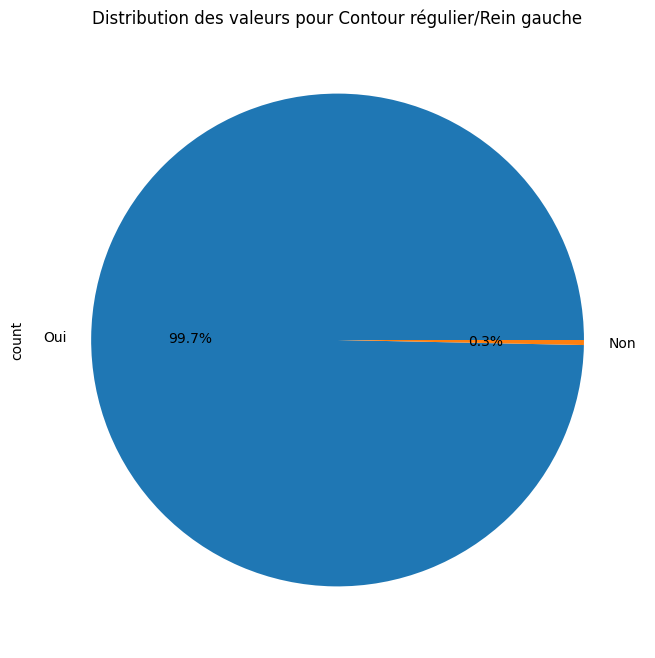


Variable: Contour régulier/Rein droit
Valeurs potentiellement incohérentes (trop rares):
Contour régulier/Rein droit
Non    3
Name: count, dtype: int64


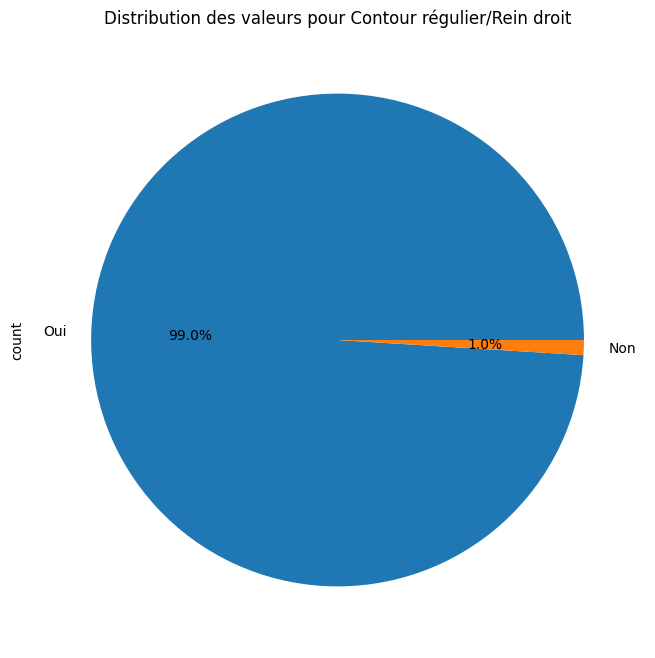


Variable: Echogénicité
Valeurs potentiellement incohérentes (trop rares):
Echogénicité
Hypo Echogénicité    1
Name: count, dtype: int64


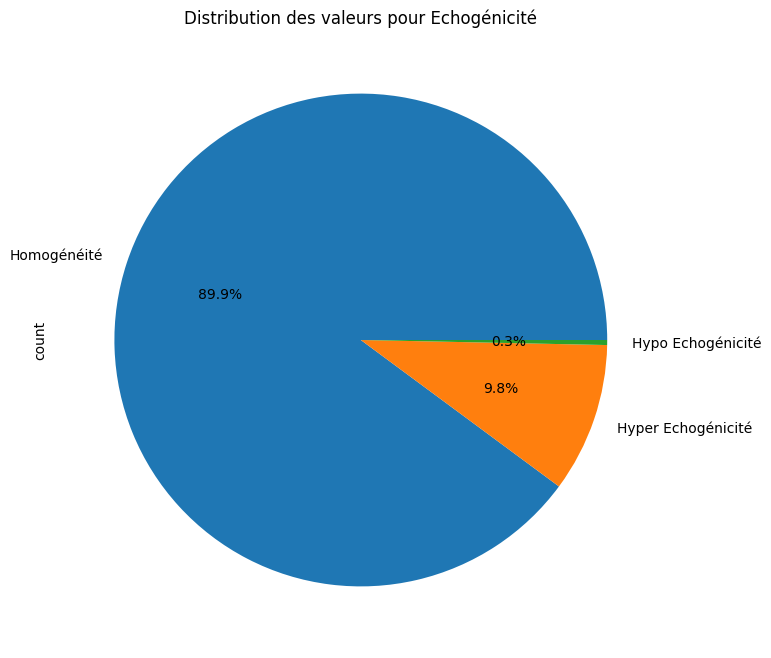

In [228]:
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    # Comptage des valeurs uniques
    value_counts = df_clean[col].value_counts()
    
    # Détection des valeurs rares (potentiellement erronées)
    threshold = 0.01 * len(df_clean)  # 1% des données comme seuil
    rare_values = value_counts[value_counts < threshold]
    
    if not rare_values.empty:
        print(f"\nVariable: {col}")
        print("Valeurs potentiellement incohérentes (trop rares):")
        print(rare_values)
        
        # Pie chart des valeurs
        plt.figure(figsize=(8, 8))
        df_clean[col].value_counts().plot.pie(autopct='%1.1f%%')
        plt.title(f"Distribution des valeurs pour {col}")
        plt.show()

In [230]:
# Suppression des valeurs incohérentes dans les colonnes spécifiques
# Exemple : Suppression des lignes où la valeur de "Echogénicité" est "Hypo Echogénicité"
df_clean = df_clean[df_clean["Echogénicité"] != "Hypo Echogénicité"]

# Vérification après suppression
print("Valeurs restantes après suppression des incohérences :")
print(df_clean["Echogénicité"].value_counts())

Valeurs restantes après suppression des incohérences :
Echogénicité
Homogénéité           275
Hyper Echogénicité     30
Name: count, dtype: int64


In [231]:
df_clean

,Contour régulier/Rein gauche,Contour régulier/Rein droit,Calcul Rénal,Kyste,Différenciation des reins,Echogénicité,Personnels Médicaux/Diabète 1,Personnels Médicaux/Diabète 2,Personnels Familiaux/Diabète,Durée Diabète 2 (mois),...,Hb (g/dL),Hte (%),VGM (fL),TCMH (pg),CCMH (%),Plaquettes (g/L),Poul (bpm),Poids (Kg),Personnels Médicaux/IRC,Stage de l'IRC
0,Oui,Oui,Non,Non,Bien différenciés,Homogénéité,0,0,0,120.0,...,11.0,32.0,88.0,31.0,35.0,309.0,85.0,73.0,1,5.0
1,Oui,Oui,Non,Non,Bien différenciés,Hyper Echogénicité,0,0,0,120.0,...,9.0,30.0,74.0,23.0,31.0,421.0,110.0,73.0,0,5.0
2,Oui,Oui,Non,Non,Bien différenciés,Homogénéité,0,1,0,90.0,...,9.0,28.0,81.0,27.0,34.0,185.0,19.0,73.0,1,5.0
3,Oui,Oui,Non,Non,Bien différenciés,Homogénéité,0,0,0,120.0,...,8.0,24.0,95.0,32.0,33.0,343.0,82.0,73.0,0,5.0
4,Oui,Oui,Non,Non,Bien différenciés,Homogénéité,0,0,0,120.0,...,9.0,28.0,69.0,22.0,32.0,248.0,69.0,73.0,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Oui,Oui,Non,Non,Bien différenciés,Homogénéité,0,0,0,120.0,...,12.0,41.0,89.0,27.0,30.0,394.0,84.0,67.0,0,2.0
302,Oui,Oui,Non,Non,Perte de différenciation,Homogénéité,0,0,0,120.0,...,10.0,28.0,55.0,27.0,34.0,252.0,83.0,65.0,0,2.0
303,Oui,Oui,Non,Non,Bien différenciés,Homogénéité,0,0,0,120.0,...,10.0,28.0,82.0,27.0,32.5,240.5,63.0,81.0,0,2.0
304,Oui,Oui,Non,Non,Bien différenciés,Homogénéité,0,1,0,120.0,...,12.0,28.0,97.0,27.0,31.0,170.0,71.0,88.0,0,2.0



Variable: Personnels Médicaux/Diabète 1
Valeurs aberrantes détectées: 5
Plage normale: [0.00, 0.00]
Exemples d'outliers:
     Personnels Médicaux/Diabète 1
54                               1
55                               1
77                               1
215                              1
216                              1


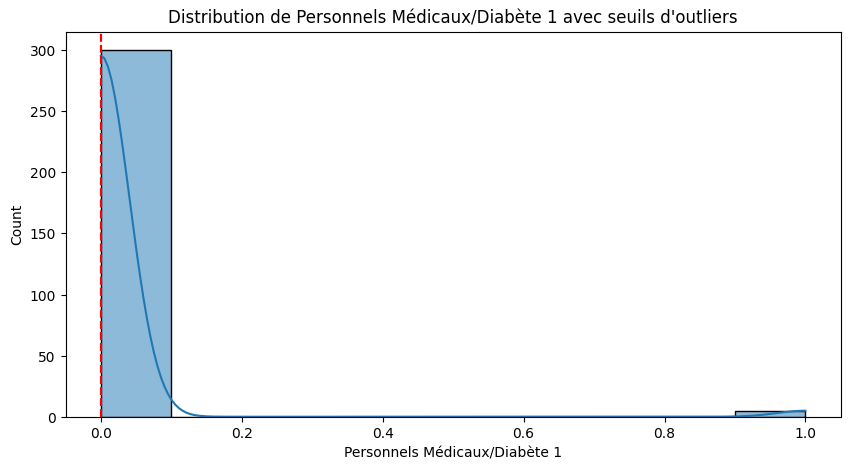


Variable: Personnels Familiaux/Diabète
Valeurs aberrantes détectées: 10
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Personnels Familiaux/Diabète
8                              1
11                             1
13                             1
28                             1
36                             1


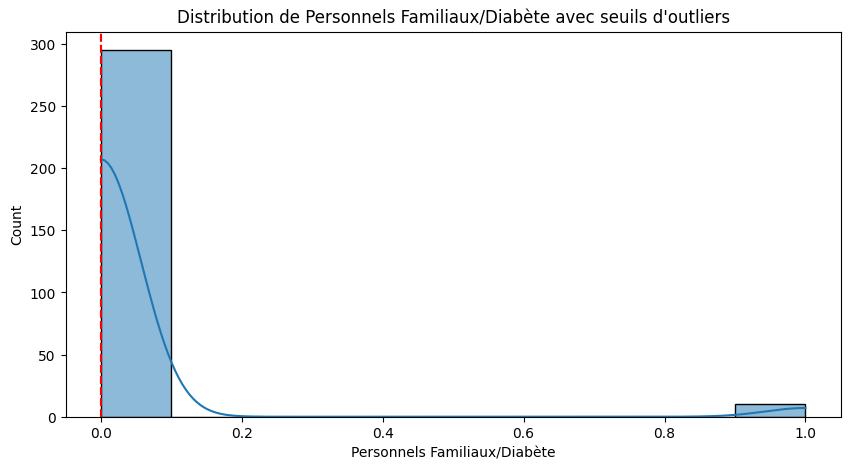


Variable: Durée Diabète 2 (mois)
Valeurs aberrantes détectées: 32
Plage normale: [120.00, 120.00]
Exemples d'outliers:
    Durée Diabète 2 (mois)
2                     90.0
15                    90.0
16                    36.0
26                    90.0
34                    36.0


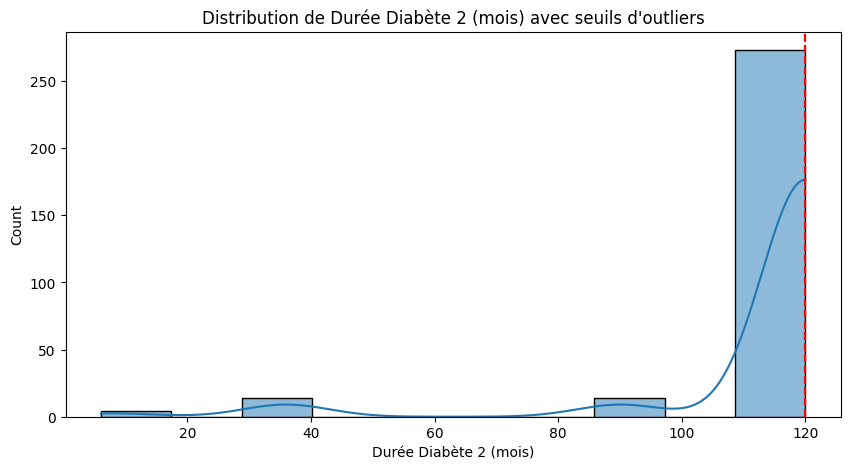


Variable: Pathologies/Rétinopathie diabétique
Valeurs aberrantes détectées: 10
Plage normale: [0.00, 0.00]
Exemples d'outliers:
     Pathologies/Rétinopathie diabétique
54                                     1
146                                    1
222                                    1
252                                    1
259                                    1


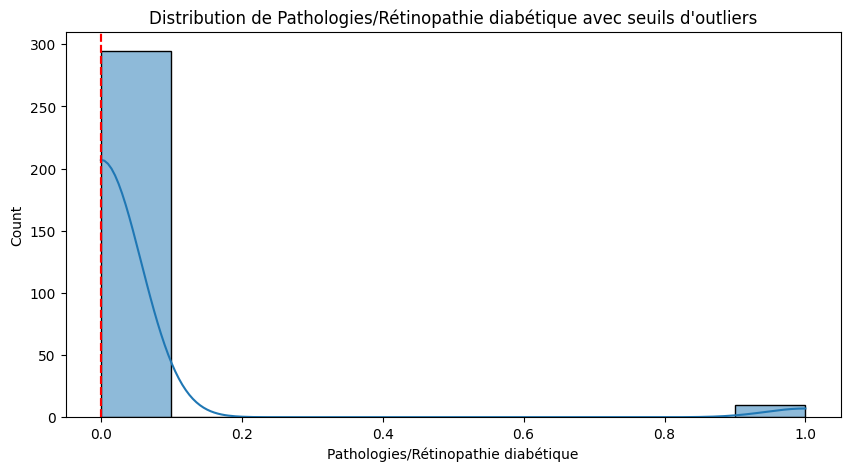


Variable: Personnels Médicaux/HTA
Valeurs aberrantes détectées: 66
Plage normale: [1.00, 1.00]
Exemples d'outliers:
    Personnels Médicaux/HTA
1                         0
3                         0
7                         0
13                        0
14                        0


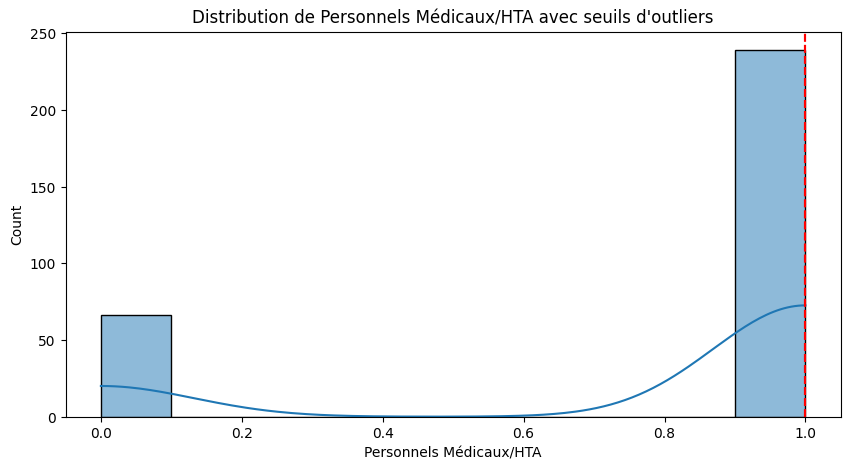


Variable: Personnels Familiaux/HTA
Valeurs aberrantes détectées: 14
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Personnels Familiaux/HTA
20                         1
21                         1
26                         1
36                         1
41                         1


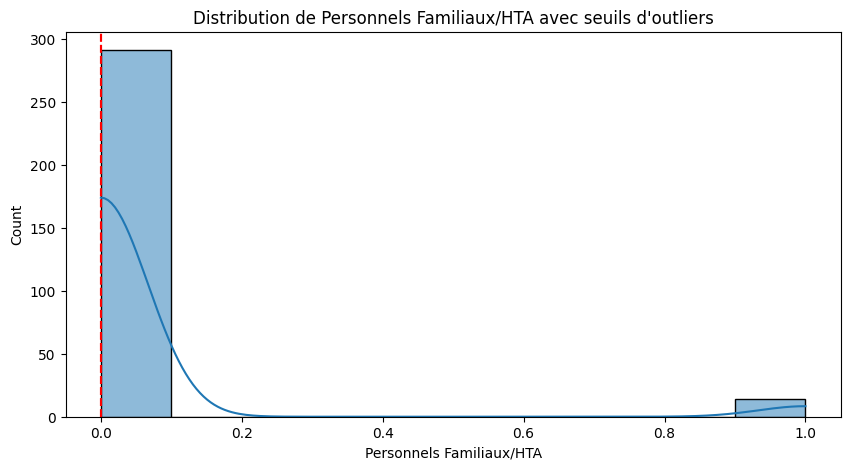


Variable: Durée HTA (mois)
Valeurs aberrantes détectées: 70
Plage normale: [45.00, 165.00]
Exemples d'outliers:
    Durée HTA (mois)
6                9.0
9                6.0
10               6.0
12               9.0
20              36.0


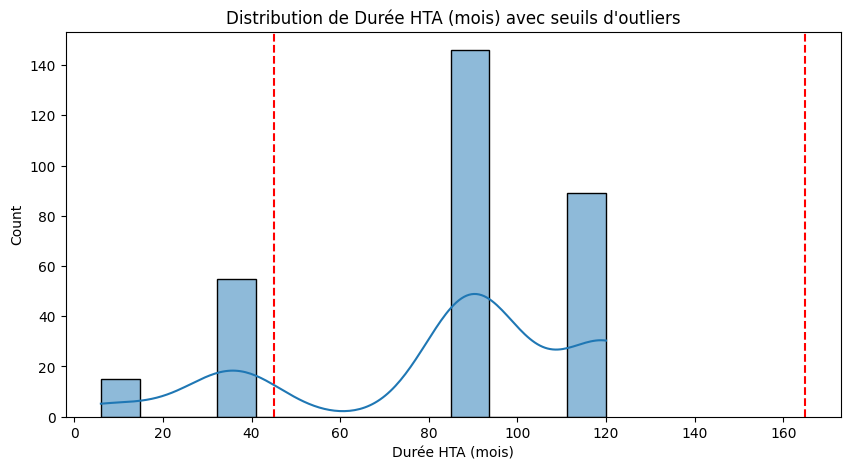


Variable: Pathologies/Rétinopathie hypertensive
Valeurs aberrantes détectées: 31
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Pathologies/Rétinopathie hypertensive
4                                       1
7                                       1
8                                       1
17                                      1
26                                      1


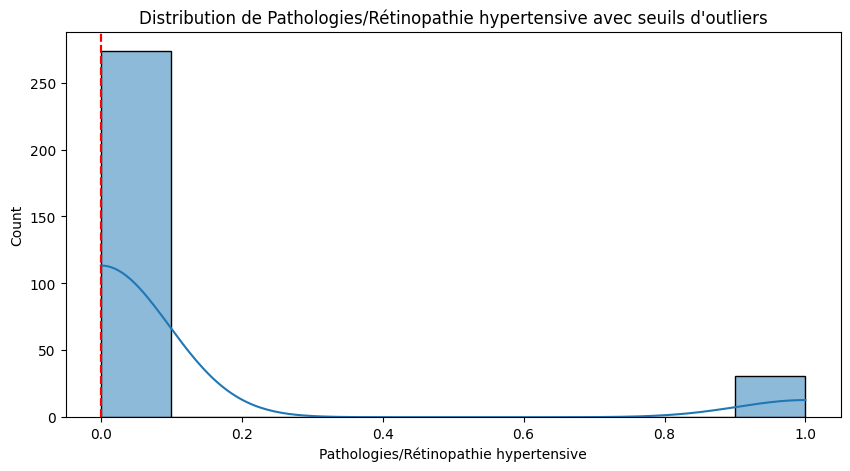


Variable: Pathologies/Glaucome
Valeurs aberrantes détectées: 11
Plage normale: [0.00, 0.00]
Exemples d'outliers:
     Pathologies/Glaucome
4                       1
67                      1
74                      1
84                      1
100                     1


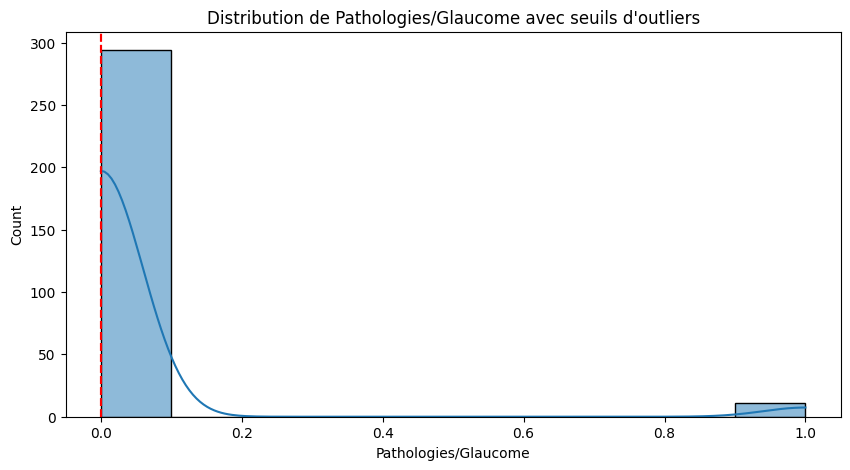


Variable: Personnels Médicaux/Pathologies virales (HB, HC, HIV)
Valeurs aberrantes détectées: 18
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Personnels Médicaux/Pathologies virales (HB, HC, HIV)
10                                                  1    
34                                                  1    
42                                                  1    
57                                                  1    
75                                                  1    


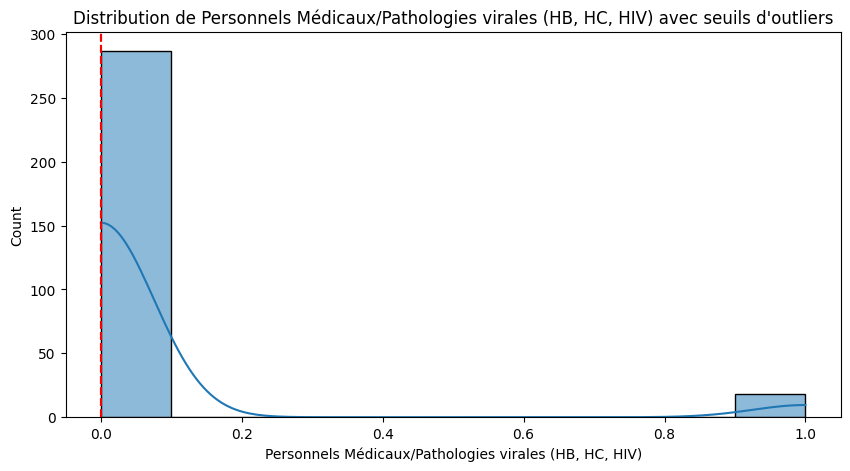


Variable: Enquête Sociale/PEC oui
Valeurs aberrantes détectées: 44
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Enquête Sociale/PEC oui
2                         1
4                         1
21                        1
25                        1
32                        1


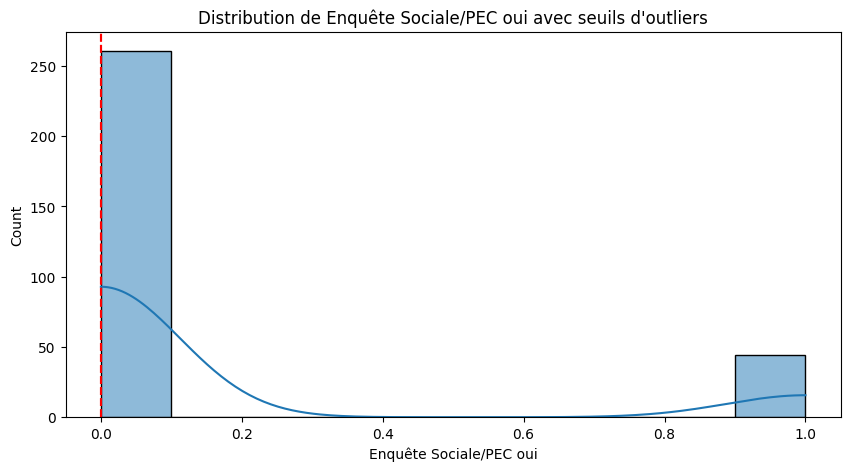


Variable: Créatinine (mg/L)
Valeurs aberrantes détectées: 50
Plage normale: [-16.50, 59.50]
Exemples d'outliers:
   Créatinine (mg/L)
0                169
4                500
5                156
6                112
7                171


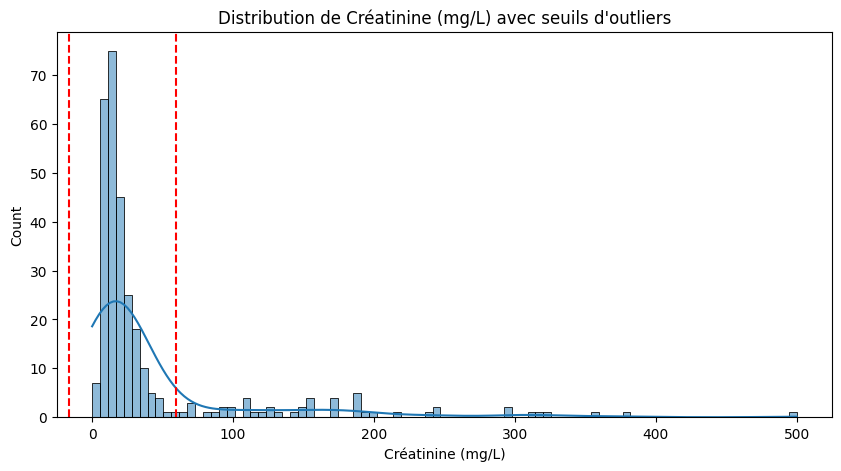


Variable: Symptômes/Fièvre
Valeurs aberrantes détectées: 23
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Symptômes/Fièvre
0                  1
1                  1
6                  1
13                 1
15                 1


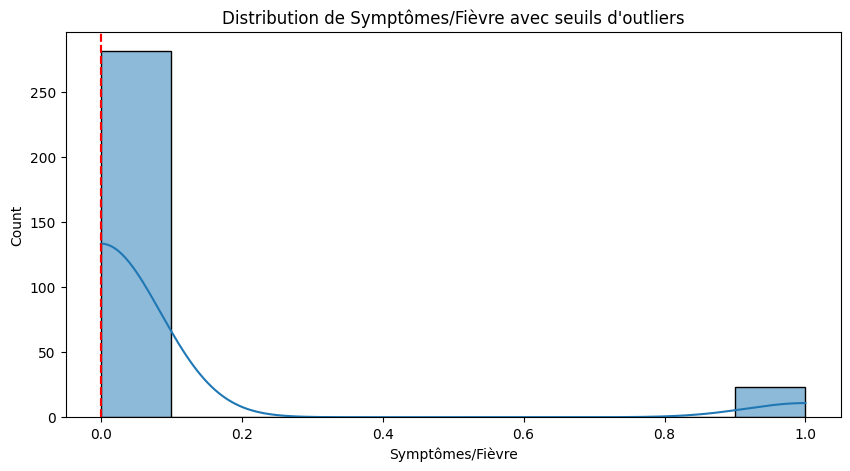


Variable: Symptômes/Céphalées
Valeurs aberrantes détectées: 28
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Symptômes/Céphalées
0                     1
1                     1
6                     1
17                    1
22                    1


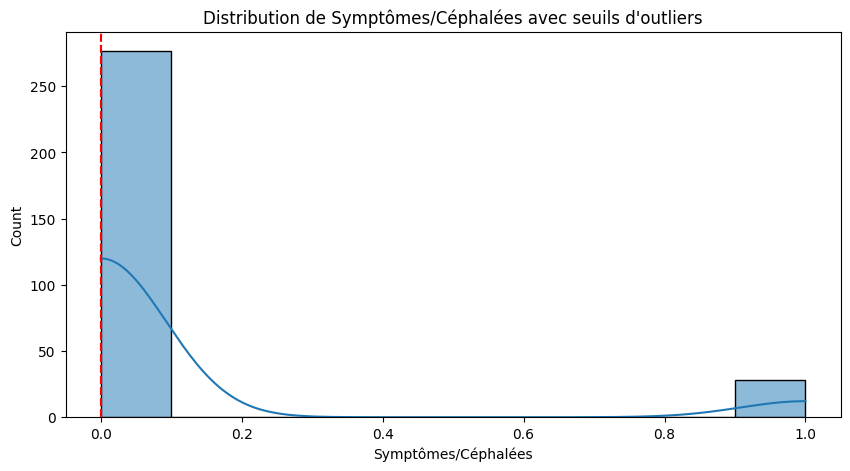


Variable: Symptômes/Douleur Lombaire
Valeurs aberrantes détectées: 26
Plage normale: [0.00, 0.00]
Exemples d'outliers:
     Symptômes/Douleur Lombaire
0                             1
41                            1
110                           1
137                           1
157                           1


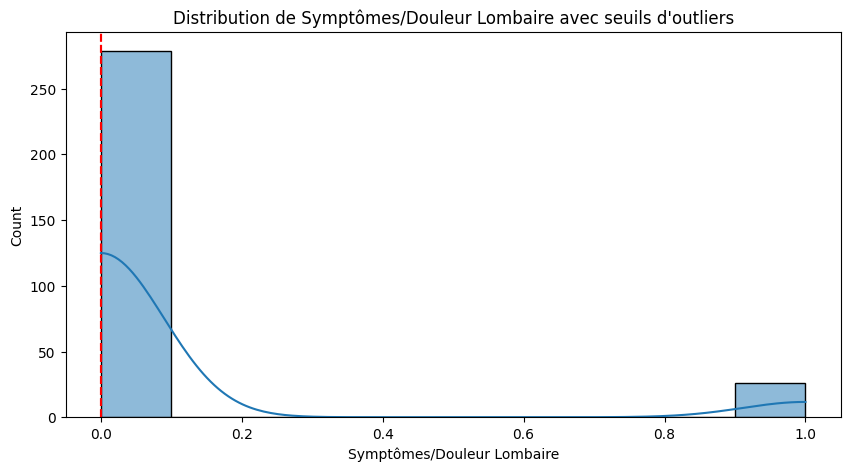


Variable: Symptômes/Dysurie
Valeurs aberrantes détectées: 4
Plage normale: [0.00, 0.00]
Exemples d'outliers:
     Symptômes/Dysurie
32                   1
142                  1
214                  1
263                  1


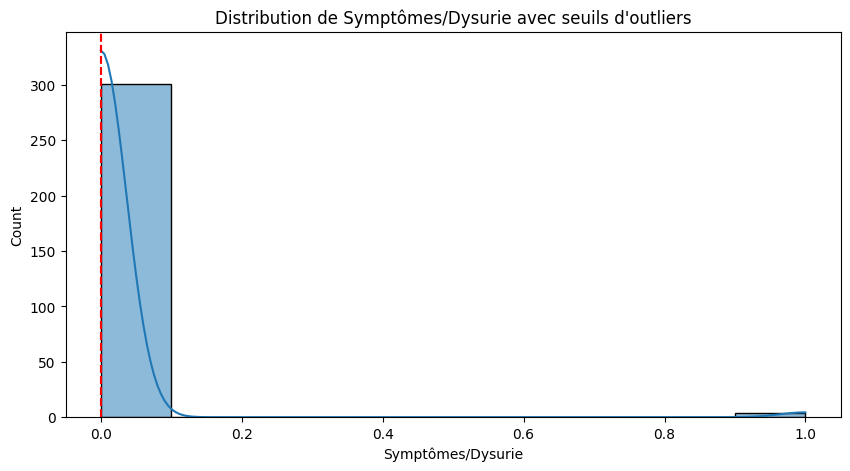


Variable: Symptômes/Oligurie
Valeurs aberrantes détectées: 15
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Symptômes/Oligurie
6                    1
7                    1
14                   1
28                   1
30                   1


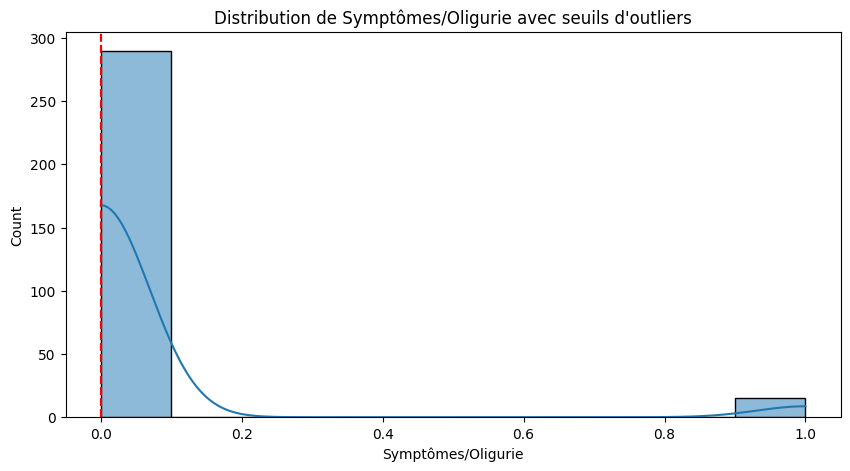


Variable: Symptômes/Diarrhée
Valeurs aberrantes détectées: 25
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Symptômes/Diarrhée
1                    1
2                    1
6                    1
14                   1
15                   1


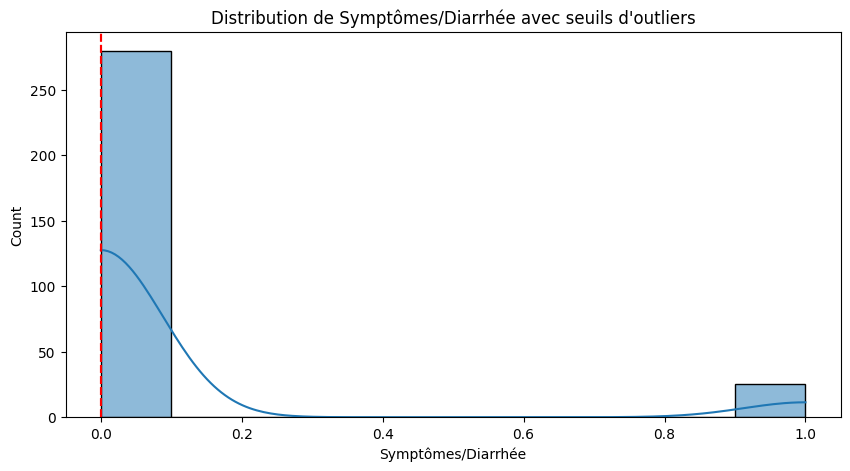


Variable: Symptômes/Douleur Thoracique
Valeurs aberrantes détectées: 9
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Symptômes/Douleur Thoracique
0                              1
13                             1
27                             1
28                             1
29                             1


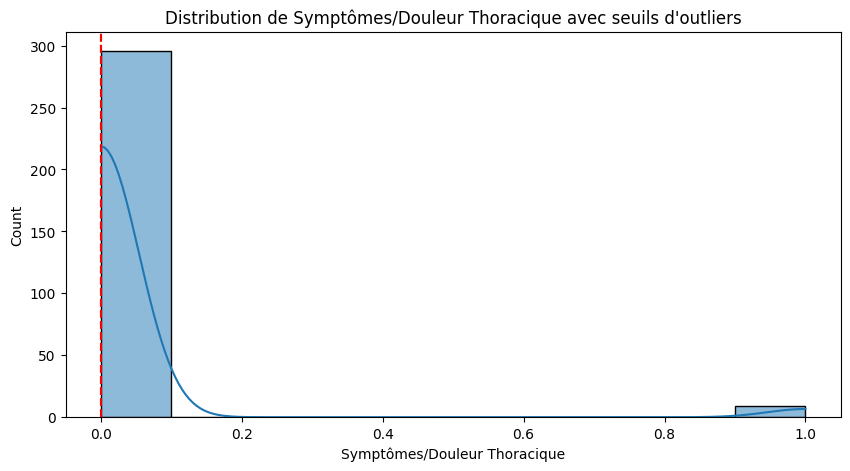


Variable: Créatinine (mg/L)
Valeurs aberrantes détectées: 50
Plage normale: [-16.50, 59.50]
Exemples d'outliers:
   Créatinine (mg/L)
0                169
4                500
5                156
6                112
7                171


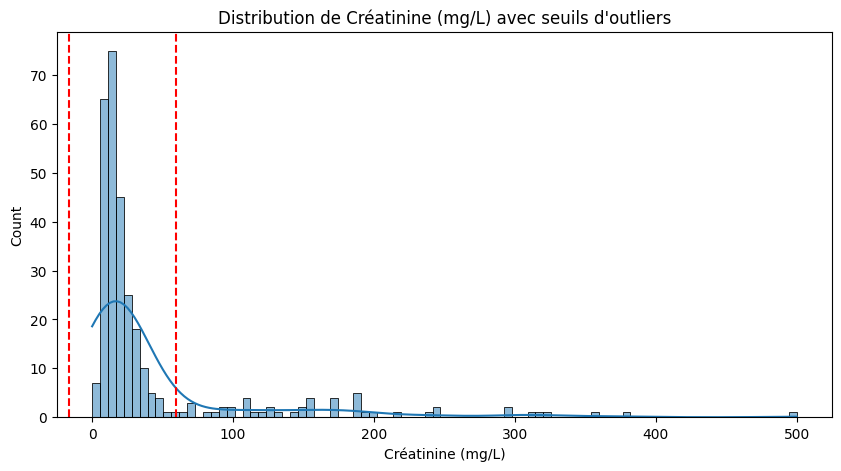


Variable: Na^+ (meq/L)
Valeurs aberrantes détectées: 24
Plage normale: [131.00, 147.00]
Exemples d'outliers:
    Na^+ (meq/L)
5          130.0
9          123.0
11         117.0
15         114.0
17         129.0


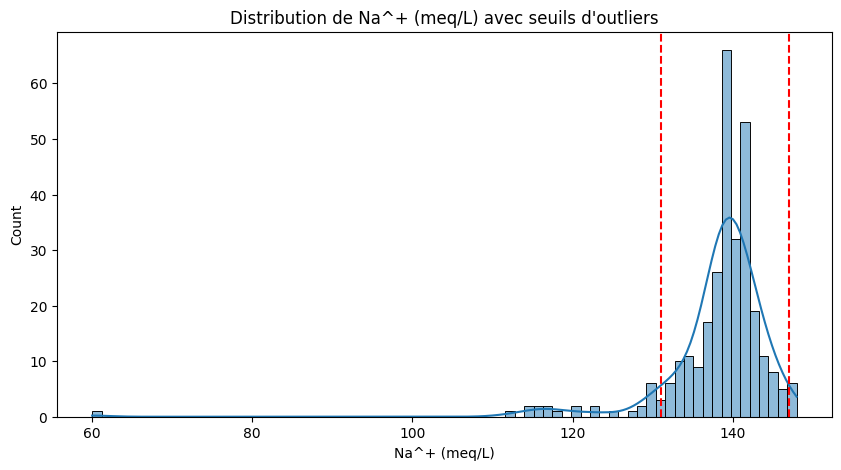


Variable: K^+ (meq/L)
Valeurs aberrantes détectées: 10
Plage normale: [1.50, 5.50]
Exemples d'outliers:
    K^+ (meq/L)
0           6.0
10          6.0
15          1.0
35          6.0
47         36.0


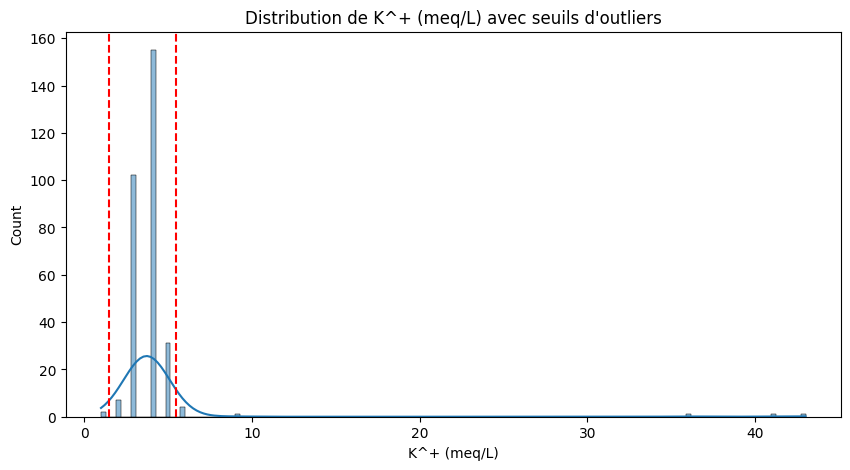


Variable: Ca^2+ (meq/L)
Valeurs aberrantes détectées: 17
Plage normale: [76.00, 108.00]
Exemples d'outliers:
    Ca^2+ (meq/L)
6            72.0
14           73.0
15           70.0
25           62.0
34            4.0


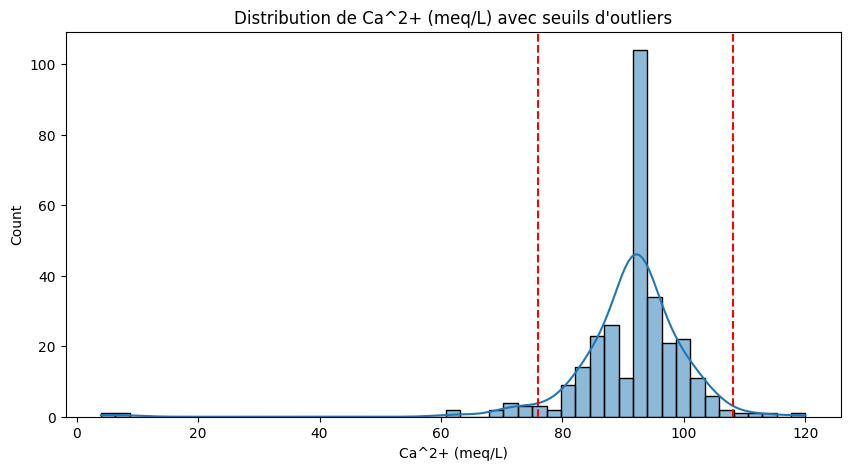


Variable: Cl^- (meq/L)
Valeurs aberrantes détectées: 22
Plage normale: [92.50, 112.50]
Exemples d'outliers:
    Cl^- (meq/L)
9           87.0
10         115.0
11          86.0
15          76.0
17          92.0


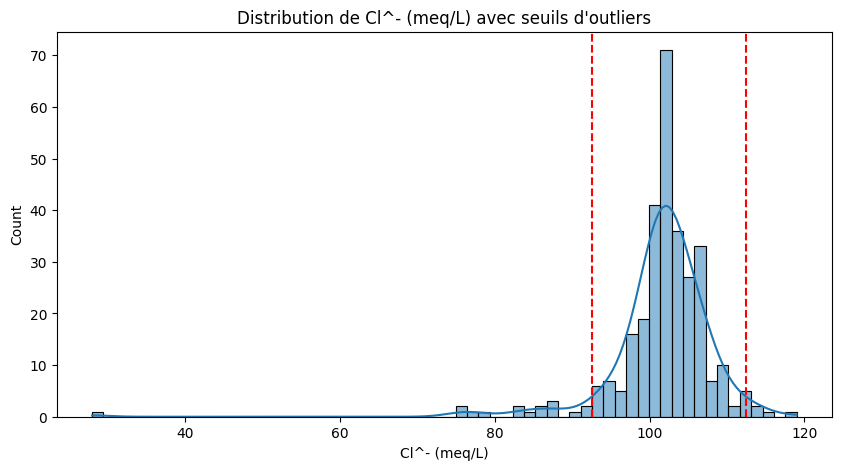


Variable: P (meq/L)
Valeurs aberrantes détectées: 130
Plage normale: [38.50, 38.50]
Exemples d'outliers:
   P (meq/L)
0       43.0
3       94.0
7       50.0
8       55.0
9       39.0


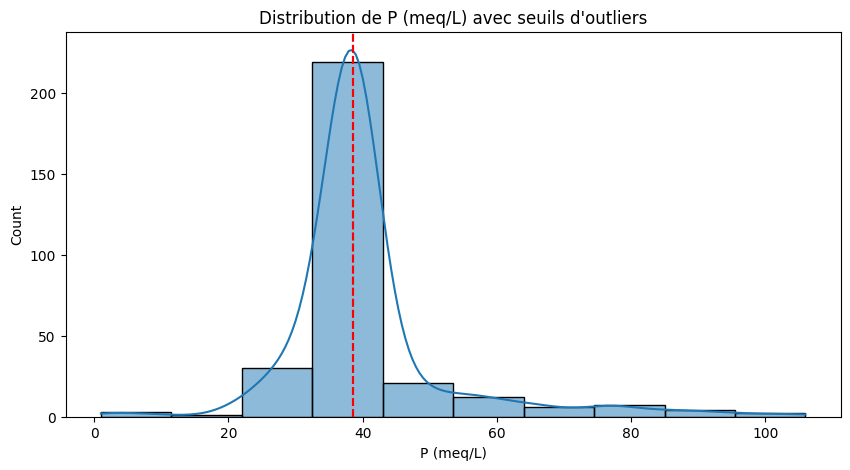


Variable: Hb (g/dL)
Valeurs aberrantes détectées: 11
Plage normale: [4.50, 16.50]
Exemples d'outliers:
    Hb (g/dL)
27        4.0
30        4.0
36        3.0
42        3.0
93      111.0


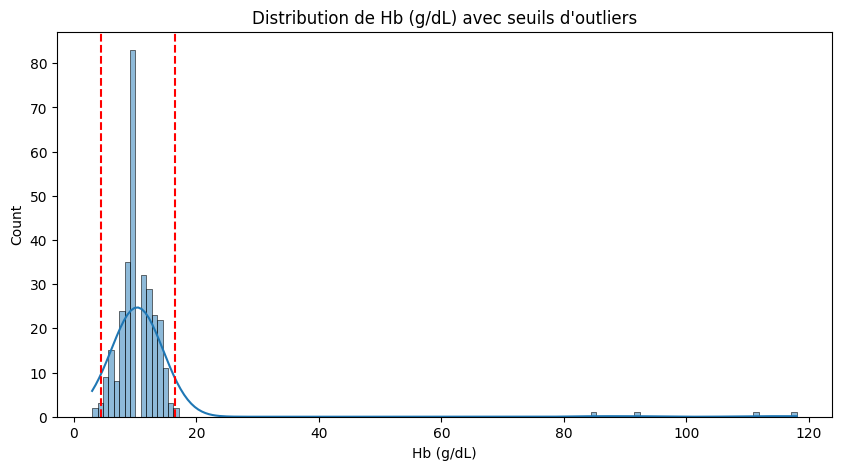


Variable: Hte (%)
Valeurs aberrantes détectées: 97
Plage normale: [28.00, 28.00]
Exemples d'outliers:
   Hte (%)
0     32.0
1     30.0
3     24.0
6     34.0
8     27.0


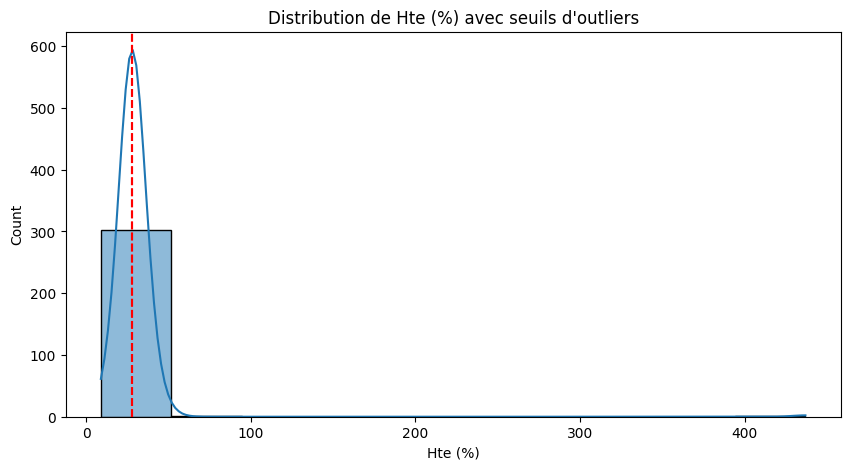


Variable: VGM (fL)
Valeurs aberrantes détectées: 103
Plage normale: [77.00, 85.00]
Exemples d'outliers:
   VGM (fL)
0      88.0
1      74.0
3      95.0
4      69.0
6      69.0


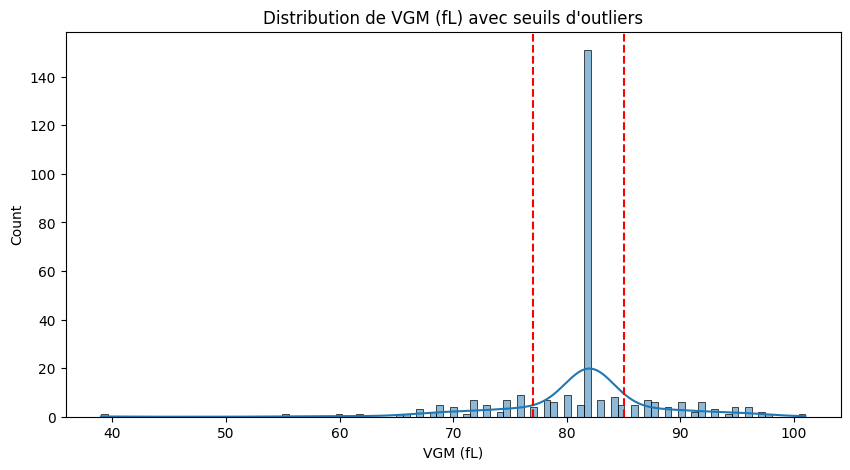


Variable: TCMH (pg)
Valeurs aberrantes détectées: 89
Plage normale: [27.00, 27.00]
Exemples d'outliers:
   TCMH (pg)
0       31.0
1       23.0
3       32.0
4       22.0
6       25.0


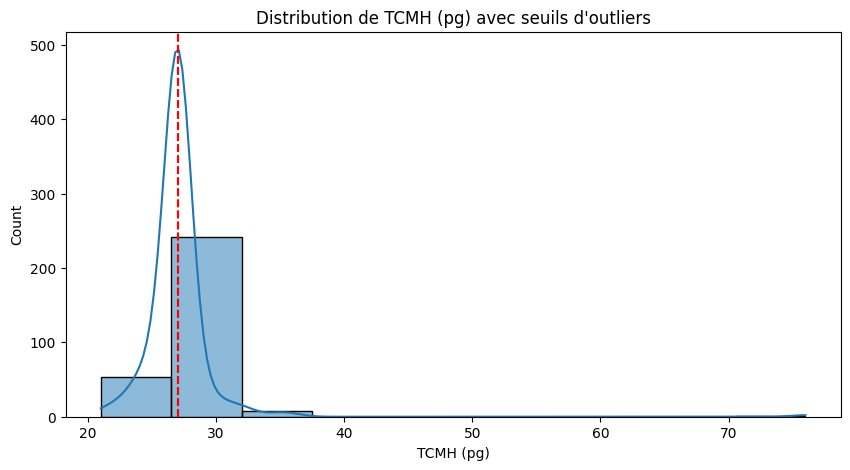


Variable: CCMH (%)
Valeurs aberrantes détectées: 139
Plage normale: [32.50, 32.50]
Exemples d'outliers:
   CCMH (%)
0      35.0
1      31.0
2      34.0
3      33.0
4      32.0


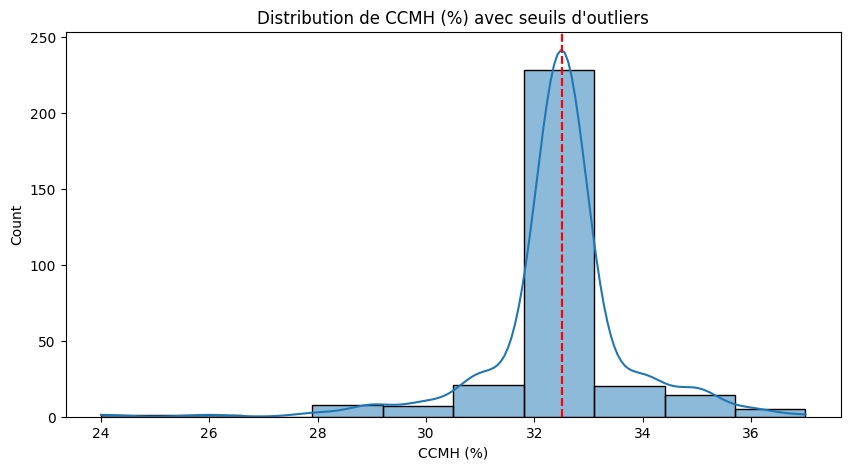


Variable: Plaquettes (g/L)
Valeurs aberrantes détectées: 50
Plage normale: [135.50, 347.50]
Exemples d'outliers:
    Plaquettes (g/L)
1              421.0
8               97.0
11             529.0
16             113.0
22             121.0


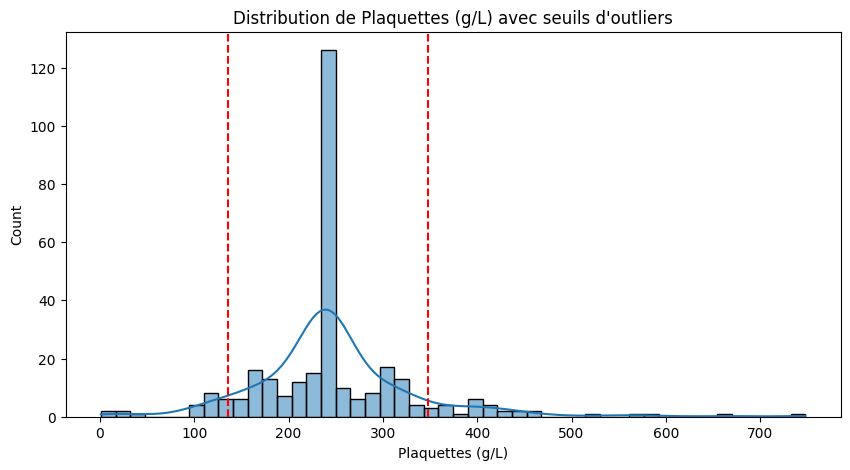


Variable: Poul (bpm)
Valeurs aberrantes détectées: 24
Plage normale: [55.00, 111.00]
Exemples d'outliers:
    Poul (bpm)
2         19.0
9        114.0
15        51.0
24       120.0
27       121.0


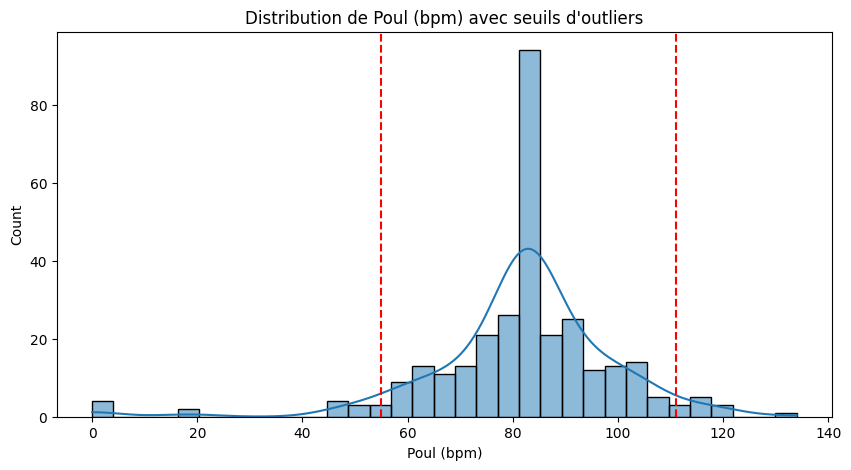


Variable: Poids (Kg)
Valeurs aberrantes détectées: 63
Plage normale: [58.00, 90.00]
Exemples d'outliers:
    Poids (Kg)
13        55.0
14        50.0
28        55.0
32        53.0
44        48.0


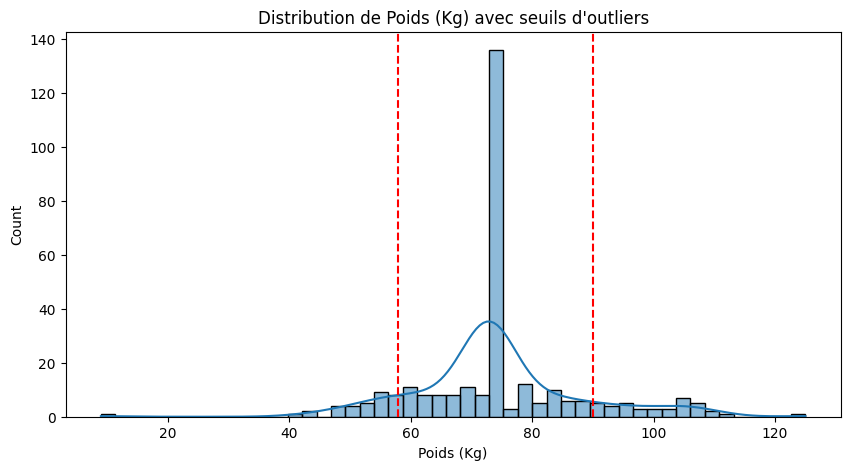


Variable: Personnels Médicaux/IRC
Valeurs aberrantes détectées: 29
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Personnels Médicaux/IRC
0                         1
2                         1
4                         1
7                         1
10                        1


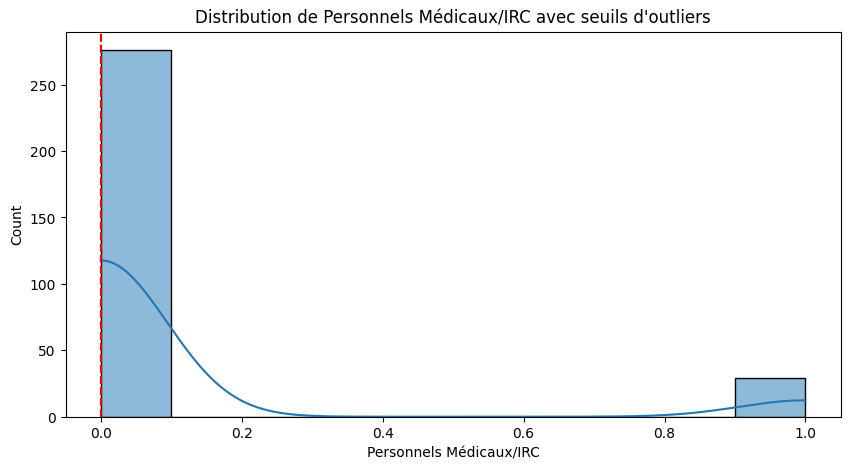


Variable: Personnels Médicaux/HTA
Valeurs aberrantes détectées: 66
Plage normale: [1.00, 1.00]
Exemples d'outliers:
    Personnels Médicaux/HTA
1                         0
3                         0
7                         0
13                        0
14                        0


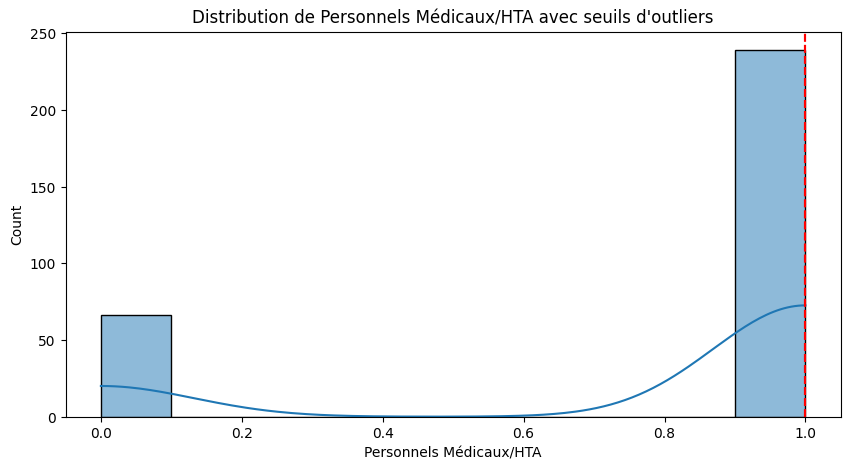


Variable: Personnels Médicaux/Diabète 1
Valeurs aberrantes détectées: 5
Plage normale: [0.00, 0.00]
Exemples d'outliers:
     Personnels Médicaux/Diabète 1
54                               1
55                               1
77                               1
215                              1
216                              1


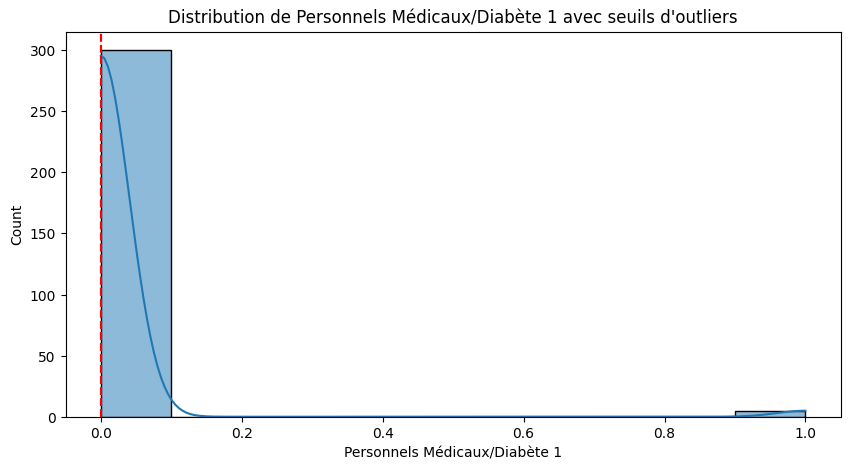


Variable: Personnels Médicaux/Pathologies virales (HB, HC, HIV)
Valeurs aberrantes détectées: 18
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Personnels Médicaux/Pathologies virales (HB, HC, HIV)
10                                                  1    
34                                                  1    
42                                                  1    
57                                                  1    
75                                                  1    


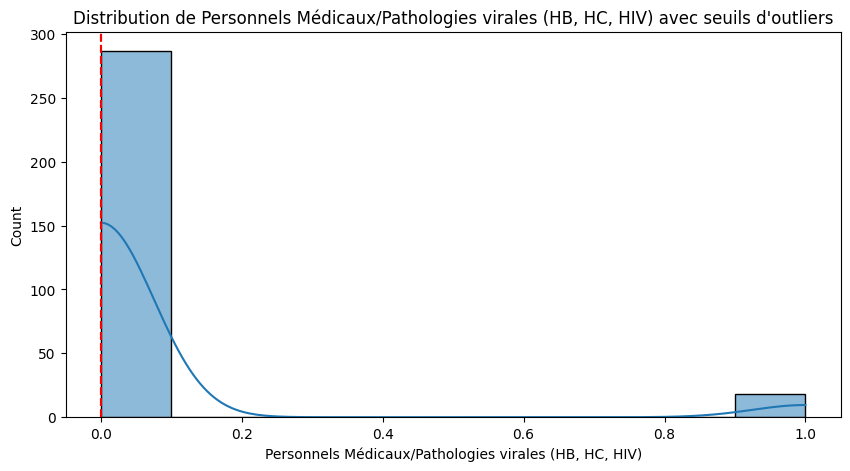

In [232]:
for col in numeric_cols:
    # Calcul des limites statistiques
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    # Détection des outliers
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    
    if not outliers.empty:
        print(f"\nVariable: {col}")
        print(f"Valeurs aberrantes détectées: {len(outliers)}")
        print(f"Plage normale: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print("Exemples d'outliers:")
        print(outliers[[col]].head())
        
        # Histogramme avec seuils
        plt.figure(figsize=(10, 5))
        sns.histplot(df_clean[col], kde=True)
        plt.axvline(lower_bound, color='r', linestyle='--')
        plt.axvline(upper_bound, color='r', linestyle='--')
        plt.title(f"Distribution de {col} avec seuils d'outliers")
        plt.show()

In [233]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 305
Data columns (total 47 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Contour régulier/Rein gauche                           305 non-null    object 
 1   Contour régulier/Rein droit                            305 non-null    object 
 2   Calcul Rénal                                           305 non-null    object 
 3   Kyste                                                  305 non-null    object 
 4   Différenciation des reins                              305 non-null    object 
 5   Echogénicité                                           305 non-null    object 
 6   Personnels Médicaux/Diabète 1                          305 non-null    int64  
 7   Personnels Médicaux/Diabète 2                          305 non-null    int64  
 8   Personnels Familiaux/Diabète                           

In [241]:
# Enregistrer le DataFrame df_clean dans un fichier CSV
df_clean.to_csv("D:/Hackathon_IFRI_IA_G_8/data/processed/df_clean.csv", index=False, encoding='utf-8')
print("Le DataFrame df_clean a été enregistré au format CSV sous le nom 'df_clean.csv'.")

# Enregistrer le DataFrame df_clean dans un fichier Excel
with pd.ExcelWriter("D:/Hackathon_IFRI_IA_G_8/data/processed/df_clean.xlsx", engine='openpyxl') as writer:
    df_clean.to_excel(writer, index=False)
print("Le DataFrame df_clean a été enregistré au format Excel sous le nom 'df_clean.xlsx'.")

Le DataFrame df_clean a été enregistré au format CSV sous le nom 'df_clean.csv'.
Le DataFrame df_clean a été enregistré au format Excel sous le nom 'df_clean.xlsx'.


In [247]:
# Créer un script qui permet de créer de nouvelle ligne dans le fichier CSV avec la methode SMOTE 
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Charger le DataFrame nettoyé
df_clean_2 = pd.read_csv("D:/Hackathon_IFRI_IA_G_8/data/processed/df_clean.csv")
# Séparer les caractéristiques et la cible
X = df_clean_2.drop(columns=["stade_irc"])
y = df_clean_2["stade_irc"]
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Encodage des variables catégorielles
categorical_cols = X.select_dtypes(include=["object"]).columns
encoder = ColumnTransformer([("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)], remainder="passthrough")
X_encoded = encoder.fit_transform(X_train)
print(X_encoded.shape)  # devrait avoir le même nombre de lignes que y_train
print(y_train.shape)
# Appliquer SMOTE pour équilibrer les classes dans l'ensemble d'entraînement
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_train)
# Créer un DataFrame avec les nouvelles données générées
# Récupérer les noms des colonnes après transformation
onehot_feature_names = encoder.named_transformers_['cat'].get_feature_names_out(categorical_cols)
numeric_feature_names = [col for col in X_train.columns if col not in categorical_cols]
columns_final = list(onehot_feature_names) + numeric_feature_names

# Créer le DataFrame final
df_resampled = pd.DataFrame(X_resampled, columns=columns_final)
df_resampled["stade_irc"] = y_resampled
# Enregistrer le DataFrame avec les nouvelles lignes dans un fichier CSV
df_resampled.to_csv("D:/Hackathon_IFRI_IA_G_8/data/processed/df_resampled.csv", index=False, encoding='utf-8')
print("Le DataFrame avec les nouvelles lignes générées par SMOTE a été enregistré au format CSV sous le nom 'df_resampled.csv'.")




(244, 52)
(244,)
Le DataFrame avec les nouvelles lignes générées par SMOTE a été enregistré au format CSV sous le nom 'df_resampled.csv'.


In [248]:
df_resampled.head(30)

,contour_regulier_rein_gauche_Oui,contour_regulier_rein_droit_Non,contour_regulier_rein_droit_Oui,calcul_renal_Non,calcul_renal_Oui,kyste_Non,kyste_Oui,differenciation_des_reins_Bien différenciés,differenciation_des_reins_Perte de différenciation,echogenicite_Homogénéité,...,hb_g_dl,hte_pourcent,vgm_fl,tcmh_pg,ccmh_pourcent,plaquettes_g_l,poul_bpm,poids_kg,personnels_medicaux_irc,stade_irc
0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,12.0,35.0,82.0,27.0,32.5,30.0,105.0,73.0,0.0,4.0
1,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,10.0,28.0,65.0,27.0,30.0,331.0,83.0,73.0,0.0,2.0
2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,14.0,28.0,82.0,27.0,32.5,240.5,80.0,73.0,0.0,3.0
3,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,11.0,35.0,75.0,24.0,32.0,354.0,70.0,105.0,0.0,3.0
4,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,4.0,16.0,82.0,27.0,32.5,231.0,100.0,62.0,0.0,4.0
5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,111.0,28.0,88.0,29.0,32.5,39.0,84.0,73.0,0.0,3.0
6,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,16.0,28.0,82.0,27.0,32.5,166.0,95.0,73.0,0.0,2.0
7,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,11.0,28.0,82.0,27.0,32.5,240.5,91.0,64.0,0.0,3.0
8,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,9.0,28.0,82.0,27.0,32.5,240.5,83.0,84.0,0.0,3.0
9,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,10.0,28.0,82.0,27.0,32.5,240.5,83.0,73.0,0.0,1.0


In [175]:
df_resampled.columns

Index(['contour_regulier_rein_gauche_Oui', 'contour_regulier_rein_droit_Non',
       'contour_regulier_rein_droit_Oui', 'calcul_renal_Non',
       'calcul_renal_Oui', 'kyste_Non', 'kyste_Oui',
       'differenciation_des_reins_Bien différenciés',
       'differenciation_des_reins_Perte de différenciation',
       'echogenicite_Homogénéité', 'echogenicite_Hyper Echogénicité',
       'personnels_medicaux_diabete_1', 'personnels_medicaux_diabete_2',
       'personnels_familiaux_diabete', 'duree_diabete_2_mois',
       'pathologies_retinopathie_diabetique',
       'causes_majeure_apres_diagnostic_diabete', 'personnels_medicaux_hta',
       'personnels_familiaux_hta', 'duree_hta_mois',
       'pathologies_retinopathie_hypertensive',
       'causes_majeure_apres_diagnostic_hta', 'pathologies_glaucome',
       'personnels_medicaux_pathologies_virales_hb_hc_hiv',
       'enquete_sociale_phytotherapie_traditionnelle',
       'enquete_sociale_pec_oui', 'enquete_sociale_pec_non', 'creatinine_mg_l

In [243]:
def traiter_valeurs_aberrantes(df, colonnes):
    for col in colonnes:
        if col in df.columns:
            # Calcul des limites statistiques
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Remplacer les valeurs aberrantes par la médiane de l'intervalle normal
            median_val = df[col].median()
            df[col] = df[col].apply(lambda x: median_val if x < lower_bound or x > upper_bound else x)

    return df

# Exemple d'utilisation
colonnes_numeriques = df_clean.select_dtypes(include=['number']).columns
df_clean = traiter_valeurs_aberrantes(df_clean, colonnes_numeriques)

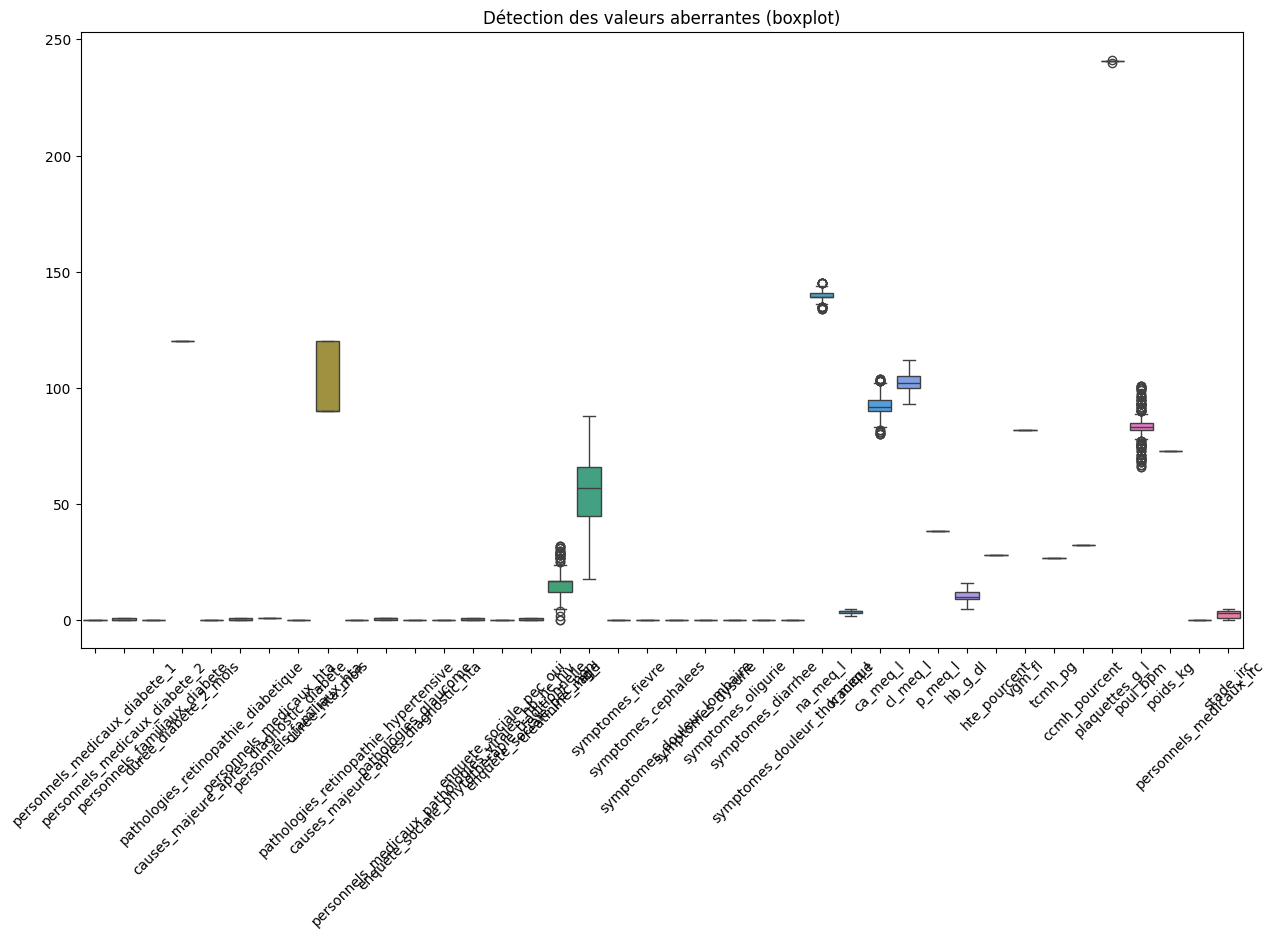

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes numériques
numeric_cols = df_clean.select_dtypes(include=['number']).columns

# Visualisation des outliers avec boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_clean[numeric_cols])
plt.xticks(rotation=45)
plt.title("Détection des valeurs aberrantes (boxplot)")
plt.show()


Variable: creatinine_mg_l
Valeurs aberrantes détectées: 33
Plage normale: [4.50, 24.50]
Exemples d'outliers:
    creatinine_mg_l
26             26.0
28              0.0
56             29.0
80              4.0
85             28.0


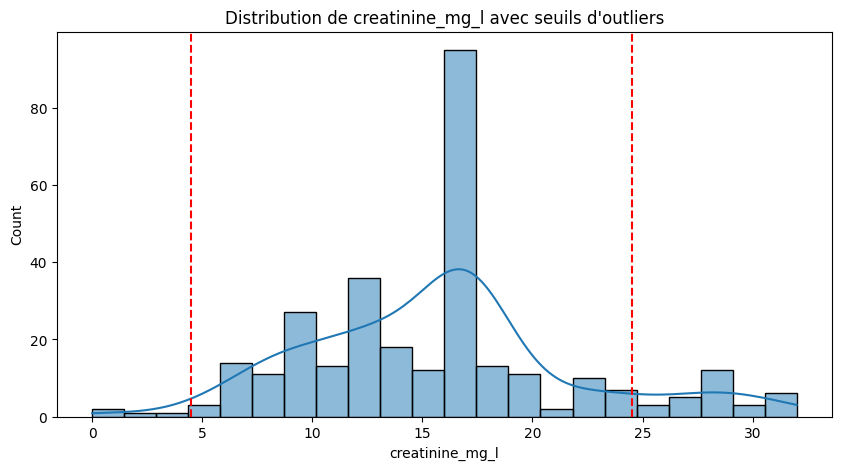


Variable: na_meq_l
Valeurs aberrantes détectées: 19
Plage normale: [136.00, 144.00]
Exemples d'outliers:
    na_meq_l
1      134.0
16     135.0
25     135.0
42     135.0
48     135.0


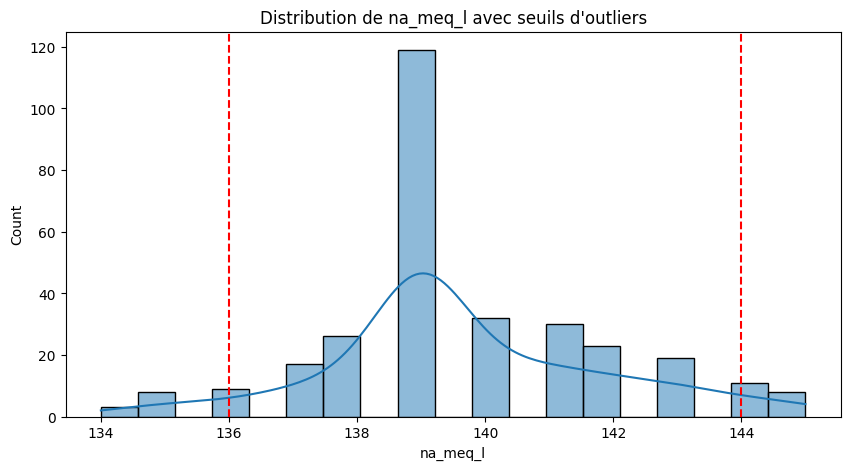


Variable: ca_meq_l
Valeurs aberrantes détectées: 20
Plage normale: [82.50, 102.50]
Exemples d'outliers:
    ca_meq_l
0       82.0
17      81.0
21     103.0
29      81.0
41      80.0


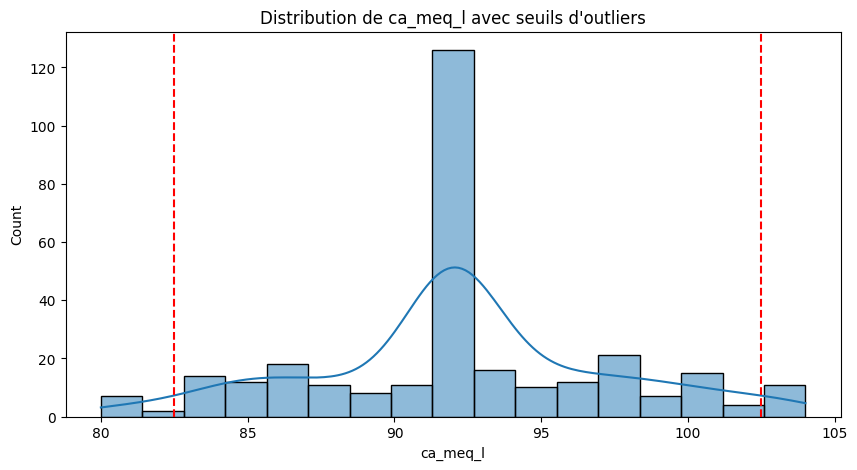


Variable: plaquettes_g_l
Valeurs aberrantes détectées: 2
Plage normale: [240.50, 240.50]
Exemples d'outliers:
     plaquettes_g_l
87            241.0
191           240.0


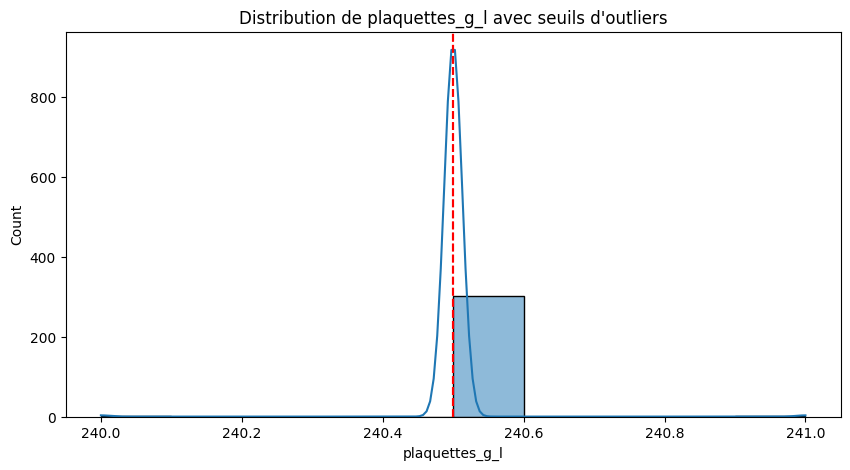


Variable: poul_bpm
Valeurs aberrantes détectées: 95
Plage normale: [77.50, 89.50]
Exemples d'outliers:
    poul_bpm
4       69.0
5       70.0
6       67.0
10      97.0
11     100.0


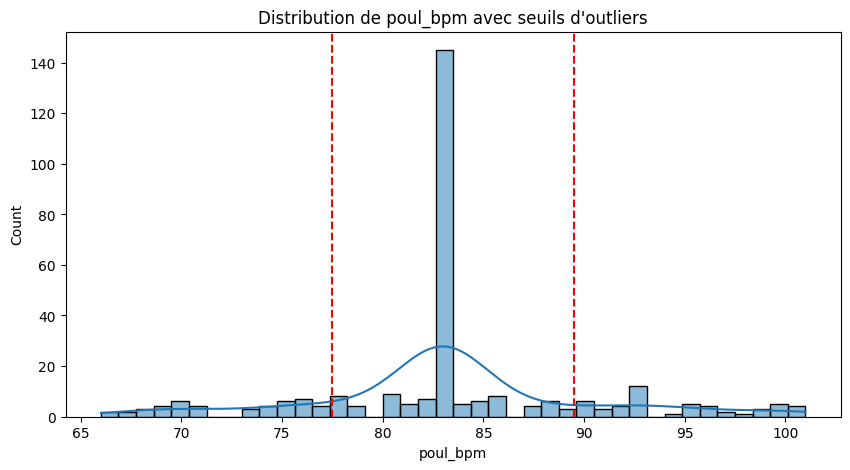

In [245]:
for col in numeric_cols:
    # Calcul des limites statistiques
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    # Détection des outliers
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    
    if not outliers.empty:
        print(f"\nVariable: {col}")
        print(f"Valeurs aberrantes détectées: {len(outliers)}")
        print(f"Plage normale: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print("Exemples d'outliers:")
        print(outliers[[col]].head())
        
        # Histogramme avec seuils
        plt.figure(figsize=(10, 5))
        sns.histplot(df_clean[col], kde=True)
        plt.axvline(lower_bound, color='r', linestyle='--')
        plt.axvline(upper_bound, color='r', linestyle='--')
        plt.title(f"Distribution de {col} avec seuils d'outliers")
        plt.show()

## Renommage des variables du df_clean

In [234]:
print("Colonnes avant renommage :", df_clean.columns.tolist())
df_clean.columns = df_clean.columns.str.strip()  # Enlever les espaces en début et fin de nom de colonne

df_clean.columns

Colonnes avant renommage : ['Contour régulier/Rein gauche', 'Contour régulier/Rein droit', 'Calcul Rénal', 'Kyste', 'Différenciation des reins', 'Echogénicité', 'Personnels Médicaux/Diabète 1', 'Personnels Médicaux/Diabète 2', 'Personnels Familiaux/Diabète', 'Durée Diabète 2 (mois)', 'Pathologies/Rétinopathie diabétique', 'Causes Majeure après Diagnostic/Diabète', 'Personnels Médicaux/HTA', 'Personnels Familiaux/HTA', 'Durée HTA (mois)', 'Pathologies/Rétinopathie hypertensive', 'Causes Majeure après Diagnostic/HTA', 'Pathologies/Glaucome', 'Personnels Médicaux/Pathologies virales (HB, HC, HIV)', 'Enquête Sociale/Phytothérapie traditionnelle', 'Enquête Sociale/PEC oui', 'Enquête Sociale/PEC non', 'Créatinine (mg/L)', 'Age', 'Sexe', 'Symptômes/Fièvre', 'Symptômes/Céphalées', 'Symptômes/Douleur Lombaire', 'Symptômes/Dysurie', 'Symptômes/Oligurie', 'Symptômes/Diarrhée', 'Symptômes/Douleur Thoracique', 'Na^+ (meq/L)', 'K^+ (meq/L)', 'Ca^2+ (meq/L)', 'Cl^- (meq/L)', 'P (meq/L)', 'Hb (g/dL)',

Index(['Contour régulier/Rein gauche', 'Contour régulier/Rein droit',
       'Calcul Rénal', 'Kyste', 'Différenciation des reins', 'Echogénicité',
       'Personnels Médicaux/Diabète 1', 'Personnels Médicaux/Diabète 2',
       'Personnels Familiaux/Diabète', 'Durée Diabète 2 (mois)',
       'Pathologies/Rétinopathie diabétique',
       'Causes Majeure après Diagnostic/Diabète', 'Personnels Médicaux/HTA',
       'Personnels Familiaux/HTA', 'Durée HTA (mois)',
       'Pathologies/Rétinopathie hypertensive',
       'Causes Majeure après Diagnostic/HTA', 'Pathologies/Glaucome',
       'Personnels Médicaux/Pathologies virales (HB, HC, HIV)',
       'Enquête Sociale/Phytothérapie traditionnelle',
       'Enquête Sociale/PEC oui', 'Enquête Sociale/PEC non',
       'Créatinine (mg/L)', 'Age', 'Sexe', 'Symptômes/Fièvre',
       'Symptômes/Céphalées', 'Symptômes/Douleur Lombaire',
       'Symptômes/Dysurie', 'Symptômes/Oligurie', 'Symptômes/Diarrhée',
       'Symptômes/Douleur Thoracique', 'Na^+

In [235]:
# Renommer les colonnes pour éviter les espaces et les caractères spéciaux
rename_dict = {
    "Contour régulier/Rein gauche": "contour_regulier_rein_gauche",
    "Contour régulier/Rein droit": "contour_regulier_rein_droit",
    "Calcul Rénal": "calcul_renal",
    "Kyste": "kyste",
    "Différenciation des reins": "differenciation_des_reins",
    "Echogénicité": "echogenicite",
    "Personnels Médicaux/Diabète 1": "personnels_medicaux_diabete_1",
    "Personnels Médicaux/Diabète 2": "personnels_medicaux_diabete_2",
    "Personnels Familiaux/Diabète": "personnels_familiaux_diabete",
    "Durée Diabète 2 (mois)": "duree_diabete_2_mois",
    "Pathologies/Rétinopathie diabétique": "pathologies_retinopathie_diabetique",
    "Causes Majeure après Diagnostic/Diabète": "causes_majeure_apres_diagnostic_diabete",
    "Personnels Médicaux/HTA": "personnels_medicaux_hta",
    "Personnels Familiaux/HTA": "personnels_familiaux_hta",
    "Durée HTA (mois)": "duree_hta_mois",
    "Pathologies/Rétinopathie hypertensive": "pathologies_retinopathie_hypertensive",
    "Causes Majeure après Diagnostic/HTA": "causes_majeure_apres_diagnostic_hta",
    "Pathologies/Glaucome": "pathologies_glaucome",
    "Personnels Médicaux/Pathologies virales (HB, HC, HIV)": "personnels_medicaux_pathologies_virales_hb_hc_hiv",
    "Enquête Sociale/Phytothérapie traditionnelle": "enquete_sociale_phytotherapie_traditionnelle",
    "Enquête Sociale/PEC oui": "enquete_sociale_pec_oui",
    "Enquête Sociale/PEC non": "enquete_sociale_pec_non",
    "Créatinine (mg/L)": "creatinine_mg_l",
    "Age": "age",
    "Sexe": "sexe",
    "Symptômes/Fièvre": "symptomes_fievre",
    "Symptômes/Céphalées": "symptomes_cephalees",
    "Symptômes/Douleur Lombaire": "symptomes_douleur_lombaire",
    "Symptômes/Dysurie": "symptomes_dysurie",
    "Symptômes/Oligurie": "symptomes_oligurie",
    "Symptômes/Diarrhée": "symptomes_diarrhee",
    "Symptômes/Douleur Thoracique": "symptomes_douleur_thoracique",
    "Na^+ (meq/L)": "na_meq_l",
    "K^+ (meq/L)": "k_meq_l",
    "Ca^2+ (meq/L)": "ca_meq_l",
    "Cl^- (meq/L)": "cl_meq_l",
    "P (meq/L)": "p_meq_l",
    "Hb (g/dL)": "hb_g_dl",
    "Hte (%)": "hte_pourcent",
    "VGM (fL)": "vgm_fl",
    "TCMH (pg)": "tcmh_pg",
    "CCMH (%)": "ccmh_pourcent",
    "Plaquettes (g/L)": "plaquettes_g_l",
    "Poul (bpm)": "poul_bpm",
    "Poids (Kg)": "poids_kg",
    "Personnels Médicaux/IRC": "personnels_medicaux_irc",
    "Stage de l'IRC": "stade_irc",
}
# Appliquer le renommage
df_clean.rename(columns=rename_dict, inplace=True)

In [236]:
df_clean.columns

Index(['contour_regulier_rein_gauche', 'contour_regulier_rein_droit',
       'calcul_renal', 'kyste', 'differenciation_des_reins', 'echogenicite',
       'personnels_medicaux_diabete_1', 'personnels_medicaux_diabete_2',
       'personnels_familiaux_diabete', 'duree_diabete_2_mois',
       'pathologies_retinopathie_diabetique',
       'causes_majeure_apres_diagnostic_diabete', 'personnels_medicaux_hta',
       'personnels_familiaux_hta', 'duree_hta_mois',
       'pathologies_retinopathie_hypertensive',
       'causes_majeure_apres_diagnostic_hta', 'pathologies_glaucome',
       'personnels_medicaux_pathologies_virales_hb_hc_hiv',
       'enquete_sociale_phytotherapie_traditionnelle',
       'enquete_sociale_pec_oui', 'enquete_sociale_pec_non', 'creatinine_mg_l',
       'age', 'sexe', 'symptomes_fievre', 'symptomes_cephalees',
       'symptomes_douleur_lombaire', 'symptomes_dysurie', 'symptomes_oligurie',
       'symptomes_diarrhee', 'symptomes_douleur_thoracique', 'na_meq_l',
       'k_

In [240]:
df_clean["sexe"].dtype

dtype('O')

In [159]:
df_clean["stade_irc"].unique()

array([5., 1., 4., 2., 0., 3.])

In [64]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 305
Data columns (total 46 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   contour_regulier_rein_gauche                       305 non-null    object 
 1   contour_regulier_rein_droit                        305 non-null    object 
 2   calcul_renal                                       305 non-null    object 
 3   kyste                                              305 non-null    object 
 4   differenciation_des_reins                          305 non-null    object 
 5   echogenicite                                       305 non-null    object 
 6   personnels_medicaux_diabete_1                      305 non-null    int64  
 7   personnels_medicaux_diabete_2                      305 non-null    int64  
 8   personnels_familiaux_diabete                       305 non-null    int64  
 9   duree_diabete_2

In [246]:
# Enregistrer le DataFrame df_clean dans un fichier CSV
df_clean.to_csv("D:/Hackathon_IFRI_IA_G_8/data/processed/df_clean_1.csv", index=False, encoding='utf-8')
print("Le DataFrame df_clean a été enregistré au format CSV sous le nom 'df_clean_1.csv'.")

# Enregistrer le DataFrame df_clean dans un fichier Excel
with pd.ExcelWriter("D:/Hackathon_IFRI_IA_G_8/data/processed/df_clean_1.xlsx", engine='openpyxl') as writer:
    df_clean.to_excel(writer, index=False)
print("Le DataFrame df_clean a été enregistré au format Excel sous le nom 'df_clean_1.xlsx'.")

Le DataFrame df_clean a été enregistré au format CSV sous le nom 'df_clean_1.csv'.
Le DataFrame df_clean a été enregistré au format Excel sous le nom 'df_clean_1.xlsx'.


In [49]:
df_clean_1 = df_clean

In [50]:
df_clean["Stage de l\'IRC"].unique()

array([5., 1., 4., 2., 0., 3.])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 305
Data columns (total 59 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Contour régulier/Rein gauche                           130 non-null    object 
 1   Contour régulier/Rein droit                            130 non-null    object 
 2   Calcul Rénal                                           130 non-null    object 
 3   Kyste                                                  130 non-null    object 
 4   Différenciation des reins                              130 non-null    object 
 5   Echogénicité                                           130 non-null    object 
 6   Contour régulier/Rein droit                            130 non-null    object 
 7   Contour régulier/Rein gauche                           130 non-null    object 
 8   Personnels Médicaux/Diabète 1                          

In [ ]:
# Lister toutes les colonnes de df_clean_1
variables = df_clean.columns.tolist()

# Afficher les colonnes
print("Liste des variables dans df_clean_1 :")
print(variables)
print(len(variables))

Liste des variables dans df_clean_1 :
['Contour régulier/Rein gauche', 'Contour régulier/Rein droit', 'Calcul Rénal', 'Kyste', 'Différenciation des reins', 'Echogénicité', 'Personnels Médicaux/Diabète 1', 'Personnels Médicaux/Diabète 2', 'Personnels Familiaux/Diabète', 'Durée Diabète 2 (mois)', 'Pathologies/Rétinopathie diabétique', 'Causes Majeure après Diagnostic/Diabète', 'Personnels Médicaux/HTA', 'Personnels Familiaux/HTA', 'Durée HTA (mois)', 'Pathologies/Rétinopathie hypertensive', 'Causes Majeure après Diagnostic/HTA', 'Pathologies/Glaucome', 'Personnels Médicaux/Pathologies virales (HB, HC, HIV)', 'Enquête Sociale/Phytothérapie traditionnelle', 'Enquête Sociale/PEC oui', 'Enquête Sociale/PEC non', 'Créatinine (mg/L)', 'Age', 'Symptômes/Fièvre', 'Symptômes/Céphalées', 'Symptômes/Douleur Lombaire', 'Symptômes/Dysurie', 'Symptômes/Oligurie', 'Symptômes/Diarrhée', 'Symptômes/Douleur Thoracique', 'Na^+ (meq/L)', 'K^+ (meq/L)', 'Ca^2+ (meq/L)', 'Cl^- (meq/L)', 'P (meq/L)', 'Hb (g/dL

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 305
Data columns (total 46 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Contour régulier/Rein gauche                           306 non-null    object 
 1   Contour régulier/Rein droit                            306 non-null    object 
 2   Calcul Rénal                                           306 non-null    object 
 3   Kyste                                                  306 non-null    object 
 4   Différenciation des reins                              306 non-null    object 
 5   Echogénicité                                           306 non-null    object 
 6   Personnels Médicaux/Diabète 1                          306 non-null    int64  
 7   Personnels Médicaux/Diabète 2                          306 non-null    int64  
 8   Personnels Familiaux/Diabète                           

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Séparer les caractéristiques (X) et la cible (y)
X = df_clean.drop(columns=["Stage de l'IRC"])  # Supprimer la colonne cible
y = df_clean["Stage de l'IRC"]  # Variable cible

# Identifier les colonnes catégorielles
categorical_cols = X.select_dtypes(include=["object"]).columns

# Appliquer One-Hot Encoding aux variables catégorielles
encoder = ColumnTransformer([("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)], remainder="passthrough")
X_encoded = encoder.fit_transform(X)

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Préparation des données terminée.")

Préparation des données terminée.


#### Entrainemant du modele Sans le PCA en utilisant le dataset df_clean

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Liste des modèles à tester
models = {
    "Arbre de décision": DecisionTreeClassifier(max_depth=6, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Régression Logistique": LogisticRegression(max_iter=1000, random_state=42)
}

# Tester chaque modèle
for name, model1 in models.items():
    print(f"🔹 Modèle: {name}")
    
    # Entraîner le modèle
    model1.fit(X_train, y_train)
    
    # Faire des prédictions
    y_pred = model1.predict(X_test)
     
    # Calculer la précision
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Précision: {accuracy:.4f}")
    
    # Afficher le rapport de classification
    print(classification_report(y_test, y_pred))
    print("-" * 50)

🔹 Modèle: Arbre de décision
Précision: 0.6613
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         6
         1.0       0.78      0.54      0.64        13
         2.0       0.43      0.33      0.38         9
         3.0       0.67      0.50      0.57        16
         4.0       0.50      1.00      0.67         7
         5.0       1.00      0.91      0.95        11

    accuracy                           0.66        62
   macro avg       0.66      0.71      0.66        62
weighted avg       0.69      0.66      0.65        62

--------------------------------------------------
🔹 Modèle: Random Forest
Précision: 0.5968
              precision    recall  f1-score   support

         0.0       0.56      0.83      0.67         6
         1.0       0.67      0.46      0.55        13
         2.0       0.33      0.33      0.33         9
         3.0       0.67      0.38      0.48        16
         4.0       0.46      0.86      0.60    

#### Entrainement du model avec le PCA en utilisant le dataset df_clean

In [ ]:
from sklearn.metrics import accuracy_score

# Prédictions sur les ensembles d'entraînement et de test
train_preds = model.predict(X_train_pca)
test_preds = model.predict(X_test_pca)

# Calcul des précisions
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Accuracy sur Train: {train_acc:.2f}")
print(f"Accuracy sur Test: {test_acc:.2f}")

# Vérification de l'écart
if train_acc - test_acc > 0.1:  # Plus de 10% de différence
    print("⚠️ Overfitting détecté !")


Accuracy sur Train: 0.88
Accuracy sur Test: 0.50
⚠️ Overfitting détecté !


In [251]:
# Identifier les colonnes en double
colonnes_doubles = df_clean.columns[df_clean.columns.duplicated()].tolist()

# Afficher les colonnes en double
print("Colonnes en double dans df_clean :")
print(colonnes_doubles)

Colonnes en double dans df_clean :
[]


In [252]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 305
Data columns (total 47 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   contour_regulier_rein_gauche                       305 non-null    object 
 1   contour_regulier_rein_droit                        305 non-null    object 
 2   calcul_renal                                       305 non-null    object 
 3   kyste                                              305 non-null    object 
 4   differenciation_des_reins                          305 non-null    object 
 5   echogenicite                                       305 non-null    object 
 6   personnels_medicaux_diabete_1                      305 non-null    float64
 7   personnels_medicaux_diabete_2                      305 non-null    int64  
 8   personnels_familiaux_diabete                       305 non-null    float64
 9   duree_diabete_2

## Visualisation des données apres gestion des valeurs manquantes

In [ ]:
# Enregistrer le dataset nettoyé dans un fichier Excel
with pd.ExcelWriter("D:/Hackathon_IFRI_IA_G_8/data/processed/dataset_nettoye_3.xlsx", engine='openpyxl') as writer:
    df.to_excel(writer, index=False)
print("Le dataset nettoyé a été enregistré sous le nom 'dataset_nettoye.xlsx'.")

Le dataset nettoyé a été enregistré sous le nom 'dataset_nettoye.xlsx'.


In [253]:
df_1 = pd.read_csv("D:\Hackathon_IFRI_IA_G_8\data\processed\dataset_nettoye_3.csv")
df_1.head()

,Sexe,Age,Nationalité,Profession (selon catégorie professionnelle),Adresse (Département),Situation Matrimoniale,Motif(s) d'Admission/Asthénie,Motif(s) d'Admission/Altération de la fonction rénale,Motif(s) d'Admission/HTA,Motif(s) d'Admission/Œdème,...,Contour régulier/Rein gauche,Pathologies/Rétinopathie hypertensive,Pathologies/Rétinopathie diabétique,Pathologies/Glaucome,Rythme Cardiaque/Sinusal,Rythme Cardiaque/Régulier,Trouble de la Repolarisation,Stage de l'IRC,Causes Majeure après Diagnostic/HTA,Causes Majeure après Diagnostic/Diabète
0,F,50.0,Béninoise,Artisan,Littoral,Marié(e),1.0,0.0,0.0,0.0,...,Oui,0.0,0.0,0.0,0.0,Oui,Non,5.0,0.0,0.0
1,M,28.0,Béninoise,Artisan,Zou,Marié(e),1.0,1.0,0.0,0.0,...,Oui,0.0,0.0,0.0,0.0,Oui,Non,5.0,0.0,0.0
2,F,69.0,Béninoise,Retriaité(e),Atlantique,Marié(e),1.0,1.0,0.0,0.0,...,Oui,0.0,0.0,0.0,0.0,Oui,Non,5.0,0.0,0.0
3,M,68.0,Béninoise,Entrepreneur,Plateau,Marié(e),1.0,0.0,1.0,1.0,...,Oui,0.0,0.0,0.0,0.0,Oui,Oui,5.0,0.0,0.0
4,F,68.0,Béninoise,Retriaité(e),Littoral,Marié(e),1.0,1.0,0.0,0.0,...,Oui,1.0,0.0,1.0,0.0,Non,Non,5.0,1.0,0.0


In [254]:

# 1. Sélection des colonnes quantitatives (numériques)
quantitative_cols = df_1.select_dtypes(include=['number']).columns
qualitative_cols = df_1.select_dtypes(exclude=['number']).columns


# 2. Remplacement par la médiane pour chaque colonne
for col in quantitative_cols:
    # Calcul de la médiane (ignore automatiquement les NaN)
    median_val = df_1[col].median()
    
    # Remplacement des valeurs manquantes
    df_1[col] = df_1[col].fillna(median_val)

for col in qualitative_cols:
    # Calcul du mode (en ignorant les NaN)
    mode_val = df_1[col].mode().iloc[0] if not df_1[col].mode().empty else "inconnu"
    
    # Remplacement des NaN
    df_1[col] = df_1[col].fillna(mode_val)

# Vérification
print("Valeurs manquantes après remplacement :")
print(df_1.isna().sum())

Valeurs manquantes après remplacement :
Sexe                                            0
Age                                             0
Nationalité                                     0
Profession (selon catégorie professionnelle)    0
Adresse (Département)                           0
                                               ..
Rythme Cardiaque/Régulier                       0
Trouble de la Repolarisation                    0
Stage de l'IRC                                  0
Causes Majeure après Diagnostic/HTA             0
Causes Majeure après Diagnostic/Diabète         0
Length: 171, dtype: int64


In [255]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Séparer les caractéristiques (X) et la cible (y)
X = df_1.drop(columns=["Stage de l'IRC"])  # Supprimer la colonne cible
y = df_1["Stage de l'IRC"]  # Variable cible

# Identifier les colonnes catégorielles et numériques
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["number"]).columns

# Transformer les données : encodage catégoriel + standardisation des numériques
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
])

X_processed = preprocessor.fit_transform(X)  # Appliquer la transformation

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Préparation des données terminée.")


Préparation des données terminée.


In [262]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Liste des modèles à tester
models2 = {
    "Arbre de décision": DecisionTreeClassifier(max_depth=6, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Régression Logistique": LogisticRegression(max_iter=1000, random_state=42)
}

# Tester chaque modèle
for name, model in models2.items():
    print(f"🔹 Modèle: {name}")
    
    # Entraîner le modèle
    model.fit(X_train, y_train)
    
    # Faire des prédictions
    y_pred = model.predict(X_test)
    
    # Calculer la précision
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Précision: {accuracy:.4f}")
    
    # Afficher le rapport de classification
    print(classification_report(y_test, y_pred))
    print("-" * 50)

🔹 Modèle: Arbre de décision
Précision: 0.7258
              precision    recall  f1-score   support

         1.0       0.71      0.83      0.77        12
         2.0       0.40      0.18      0.25        11
         3.0       0.84      0.76      0.80        21
         4.0       0.46      1.00      0.63         6
         5.0       1.00      0.92      0.96        12

    accuracy                           0.73        62
   macro avg       0.68      0.74      0.68        62
weighted avg       0.73      0.73      0.71        62

--------------------------------------------------
🔹 Modèle: Random Forest
Précision: 0.7419
              precision    recall  f1-score   support

         1.0       0.82      0.75      0.78        12
         2.0       0.60      0.27      0.38        11
         3.0       0.68      0.90      0.78        21
         4.0       0.67      0.67      0.67         6
         5.0       0.92      0.92      0.92        12

    accuracy                           0.74   

d:\Hackathon_IFRI_IA_G_8\.env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Hackathon_IFRI_IA_G_8\.env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Hackathon_IFRI_IA_G_8\.env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Précision: 0.4677
              precision    recall  f1-score   support

         1.0       0.44      0.58      0.50        12
         2.0       0.12      0.09      0.11        11
         3.0       0.48      0.52      0.50        21
         4.0       0.00      0.00      0.00         6
         5.0       1.00      0.83      0.91        12

    accuracy                           0.47        62
   macro avg       0.41      0.41      0.40        62
weighted avg       0.46      0.47      0.46        62

--------------------------------------------------


In [263]:
from sklearn.metrics import accuracy_score

# Prédictions sur les ensembles d'entraînement et de test
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Calcul des précisions
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Accuracy sur Train: {train_acc:.2f}")
print(f"Accuracy sur Test: {test_acc:.2f}")

# Vérification de l'écart
if train_acc - test_acc > 0.1:  # Plus de 10% de différence
    print("⚠️ Overfitting détecté !")

Accuracy sur Train: 1.00
Accuracy sur Test: 0.47
⚠️ Overfitting détecté !


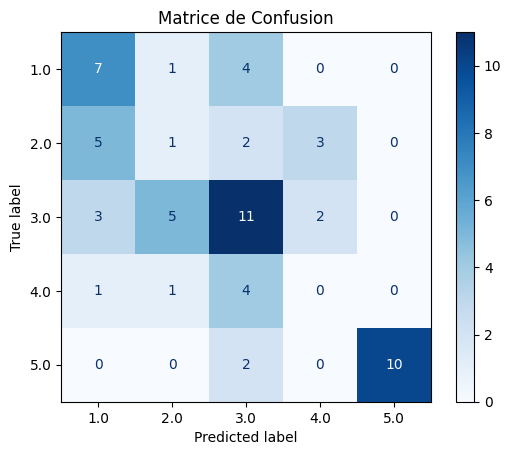

In [264]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion")
plt.show()

Voici une documentation détaillée de ce qui a été fait dans votre Jupyter Notebook jusqu'à présent :

---

### **1. Importation des bibliothèques**
Les bibliothèques nécessaires pour le traitement des données, la visualisation et la modélisation ont été importées :
- `pandas`, `numpy` pour la manipulation des données.
- `matplotlib.pyplot`, `seaborn` pour la visualisation.
- `scipy`, `sklearn` pour les statistiques et la modélisation.
- `imblearn` pour la gestion des données déséquilibrées avec SMOTE.

---

### **2. Chargement des données**
- Les données brutes ont été chargées depuis un fichier CSV : `Dataset_brute.csv`.
- Une copie des données a été créée pour éviter de modifier les données originales.

---

### **3. Sélection des variables d'intérêt**
- Une liste de variables pertinentes pour l'analyse a été définie, incluant des variables liées aux maladies rénales chroniques, au diabète, à l'hypertension, et aux analyses biologiques.
- Des variables supplémentaires ont été ajoutées pour enrichir l'analyse.

---

### **4. Vérification des colonnes**
- Vérification de l'existence des colonnes sélectionnées dans le DataFrame.
- Avertissement affiché pour les colonnes manquantes.

---

### **5. Préparation des données**
- Suppression des lignes avec des valeurs manquantes dans la colonne cible (`Stage de l'IRC`).
- Transformation des valeurs catégoriques en valeurs numériques à l'aide d'un mapping.
- Gestion des intervalles dans les colonnes en calculant la moyenne des bornes.

---

### **6. Gestion des valeurs manquantes**
- Remplacement des valeurs manquantes dans les colonnes numériques par la médiane.
- Remplacement des valeurs manquantes dans les colonnes catégoriques par le mode.

---

### **7. Gestion des valeurs aberrantes**
- Détection des valeurs aberrantes à l'aide de boxplots et des limites statistiques (IQR).
- Remplacement des valeurs aberrantes par la médiane.

---

### **8. Encodage et transformation des données**
- Les colonnes catégoriques ont été encodées avec `OneHotEncoder`.
- Les colonnes numériques ont été standardisées avec `StandardScaler`.

---

### **9. Équilibrage des classes**
- Utilisation de SMOTE pour générer des données synthétiques et équilibrer les classes dans la variable cible.

---

### **10. Modélisation**
- Plusieurs modèles de classification ont été testés, notamment :
    - Arbre de décision
    - Random Forest
    - Gradient Boosting
    - SVM
    - KNN
    - Régression Logistique
- Les performances des modèles ont été évaluées à l'aide de la précision et du rapport de classification.

---

### **11. Visualisation**
- Visualisation des valeurs manquantes avec une heatmap.
- Visualisation des distributions des variables et des valeurs aberrantes.
- Matrice de corrélation pour analyser les relations entre les variables.

---

### **12. Sauvegarde des données**
- Les données nettoyées et transformées ont été sauvegardées dans des fichiers CSV et Excel pour une utilisation ultérieure.

---

### **13. Résultats**
- Les résultats des modèles ont été comparés pour identifier le modèle le plus performant.
- Une matrice de confusion a été affichée pour évaluer les prédictions.

---

Si vous avez besoin de détails supplémentaires sur une étape spécifique, n'hésitez pas à demander !